In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt

In [27]:
#cargar archivos
df_result = pd.read_csv("../results/fechas_11/df_20250501_to_20250515_M50_preproc.csv") #cambiar la direccion

#params
M=50  #ajustar
sub_dir='../results/fechas_11/' #cambiar la direccion

In [28]:
df_result['ratio_prueba']= df_result['EQpos'] / df_result['EdQb']
df_result['Fecha'] = pd.to_datetime(df_result['Fecha'])

df_result['phi_h'] =  np.maximum(
    df_result['precio'] + np.where(
         df_result['EdQb'] != 0,
        df_result['precio']+df_result['EQpos'] / df_result['EdQb'],
        df_result['precio']
    ),
    0
)


In [29]:
df_result[
    (df_result['Fecha']=='2025-05-15') &
    (df_result['CodigoPlanta'].isin(['GVIO', 'PES1', 'SNCR']))
]

,FechaHora,CodigoPlanta,precio,cantidad,cantidad_pos,Fecha,cluster,gamma_thumb,EQpos,EdQb,ratio_prueba,phi_h
5266,2025-05-15 00:00:00,GVIO,106.39,1210000.0,1210000.0,2025-05-15,9,24.946481,1210000.0,-1609.748306,-751.670305,0.0
5267,2025-05-15 01:00:00,GVIO,106.39,1210000.0,1210000.0,2025-05-15,9,24.946481,1210000.0,-1609.748306,-751.670305,0.0
5268,2025-05-15 02:00:00,GVIO,106.39,1210000.0,1210000.0,2025-05-15,9,24.946481,1210000.0,-1620.187858,-746.826977,0.0
5269,2025-05-15 03:00:00,GVIO,106.39,1210000.0,1210000.0,2025-05-15,9,24.946481,1210000.0,-1620.187858,-746.826977,0.0
5270,2025-05-15 04:00:00,GVIO,106.39,1210000.0,1210000.0,2025-05-15,9,24.946481,1210000.0,-1609.748306,-751.670305,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10886,2025-05-15 19:00:00,SNCR,117.39,1240000.0,1240000.0,2025-05-15,9,24.943955,1240000.0,-1690.149191,-733.663044,0.0
10887,2025-05-15 20:00:00,SNCR,117.39,1240000.0,1240000.0,2025-05-15,9,24.943955,1240000.0,-1661.618314,-746.260431,0.0
10888,2025-05-15 21:00:00,SNCR,117.39,1240000.0,1240000.0,2025-05-15,9,24.943955,1240000.0,-1052.534563,-1178.108581,0.0
10889,2025-05-15 22:00:00,SNCR,117.39,1240000.0,1240000.0,2025-05-15,9,24.943955,1240000.0,-1414.173716,-876.837114,0.0


In [30]:
df_result[df_result['CodigoPlanta'].isin(['GVIO', 'PES1', 'SNCR'])]['phi_h']


5026     0.0
5027     0.0
5028     0.0
5029     0.0
5030     0.0
        ... 
10886    0.0
10887    0.0
10888    0.0
10889    0.0
10890    0.0
Name: phi_h, Length: 792, dtype: float64

In [31]:
df_result[
    (df_result['Fecha']=='2025-05-25') &
    (df_result['CodigoPlanta'].isin(['GVIO']))
]

,FechaHora,CodigoPlanta,precio,cantidad,cantidad_pos,Fecha,cluster,gamma_thumb,EQpos,EdQb,ratio_prueba,phi_h


In [32]:
df_result.iloc[5048]

FechaHora       2025-05-01 22:00:00
CodigoPlanta                   GVIO
precio                       102.64
cantidad                  1200000.0
cantidad_pos              1200000.0
Fecha           2025-05-01 00:00:00
cluster                           8
gamma_thumb               24.946481
EQpos                     1200000.0
EdQb                   -1989.251158
ratio_prueba            -603.242077
phi_h                           0.0
Name: 5048, dtype: object

In [33]:
df_result[df_result['CodigoPlanta'].isin(['GVIO'])]

,FechaHora,CodigoPlanta,precio,cantidad,cantidad_pos,Fecha,cluster,gamma_thumb,EQpos,EdQb,ratio_prueba,phi_h
5026,2025-05-01 00:00:00,GVIO,102.64,1200000.0,1200000.0,2025-05-01,8,24.946481,1200000.0,-2047.619902,-586.046267,0.0
5027,2025-05-01 01:00:00,GVIO,102.64,1200000.0,1200000.0,2025-05-01,8,24.946481,1200000.0,-2047.619902,-586.046267,0.0
5028,2025-05-01 02:00:00,GVIO,102.64,1200000.0,1200000.0,2025-05-01,8,24.946481,1200000.0,-2047.619902,-586.046267,0.0
5029,2025-05-01 03:00:00,GVIO,102.64,1200000.0,1200000.0,2025-05-01,8,24.946481,1200000.0,-2047.619902,-586.046267,0.0
5030,2025-05-01 04:00:00,GVIO,102.64,1200000.0,1200000.0,2025-05-01,8,24.946481,1200000.0,-2047.619902,-586.046267,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5285,2025-05-15 19:00:00,GVIO,106.39,1210000.0,1210000.0,2025-05-15,9,24.946481,1210000.0,-1681.048674,-719.788795,0.0
5286,2025-05-15 20:00:00,GVIO,106.39,1210000.0,1210000.0,2025-05-15,9,24.946481,1210000.0,-1729.512358,-699.619170,0.0
5287,2025-05-15 21:00:00,GVIO,106.39,1210000.0,1210000.0,2025-05-15,9,24.946481,1210000.0,-1114.313676,-1085.870187,0.0
5288,2025-05-15 22:00:00,GVIO,106.39,1210000.0,1210000.0,2025-05-15,9,24.946481,1210000.0,-1328.564574,-910.757387,0.0


In [34]:
df_result[
    (df_result['cluster']==8) &
    (df_result['precio']==102.64)
]

,FechaHora,CodigoPlanta,precio,cantidad,cantidad_pos,Fecha,cluster,gamma_thumb,EQpos,EdQb,ratio_prueba,phi_h
0,2025-05-01 00:00:00,2QEK,102.64,35000.0,35000.0,2025-05-01,8,3.761274,35000.0,-6857.128460,-5.104177,200.175823
1,2025-05-01 01:00:00,2QEK,102.64,35000.0,35000.0,2025-05-01,8,3.761274,35000.0,-6857.128460,-5.104177,200.175823
2,2025-05-01 02:00:00,2QEK,102.64,35000.0,35000.0,2025-05-01,8,3.761274,35000.0,-6857.128460,-5.104177,200.175823
3,2025-05-01 03:00:00,2QEK,102.64,35000.0,35000.0,2025-05-01,8,3.761274,35000.0,-6857.128460,-5.104177,200.175823
4,2025-05-01 04:00:00,2QEK,102.64,35000.0,35000.0,2025-05-01,8,3.761274,35000.0,-6857.128460,-5.104177,200.175823
...,...,...,...,...,...,...,...,...,...,...,...,...
11115,2025-05-08 19:00:00,SOG1,102.64,819000.0,819000.0,2025-05-08,8,20.627475,819000.0,-654.756747,-1250.846217,0.000000
11116,2025-05-08 20:00:00,SOG1,102.64,819000.0,819000.0,2025-05-08,8,20.627475,819000.0,-724.003650,-1131.209766,0.000000
11117,2025-05-08 21:00:00,SOG1,102.64,819000.0,819000.0,2025-05-08,8,20.627475,819000.0,-1732.278175,-472.787807,0.000000
11118,2025-05-08 22:00:00,SOG1,102.64,819000.0,819000.0,2025-05-08,8,20.627475,819000.0,-1742.816582,-469.928969,0.000000


In [35]:
df_result[
        (df_result['CodigoPlanta'] == 'GVIO') &
        (df_result['ratio_prueba'] < 0)
    ]

,FechaHora,CodigoPlanta,precio,cantidad,cantidad_pos,Fecha,cluster,gamma_thumb,EQpos,EdQb,ratio_prueba,phi_h
5026,2025-05-01 00:00:00,GVIO,102.64,1200000.0,1200000.0,2025-05-01,8,24.946481,1200000.0,-2047.619902,-586.046267,0.0
5027,2025-05-01 01:00:00,GVIO,102.64,1200000.0,1200000.0,2025-05-01,8,24.946481,1200000.0,-2047.619902,-586.046267,0.0
5028,2025-05-01 02:00:00,GVIO,102.64,1200000.0,1200000.0,2025-05-01,8,24.946481,1200000.0,-2047.619902,-586.046267,0.0
5029,2025-05-01 03:00:00,GVIO,102.64,1200000.0,1200000.0,2025-05-01,8,24.946481,1200000.0,-2047.619902,-586.046267,0.0
5030,2025-05-01 04:00:00,GVIO,102.64,1200000.0,1200000.0,2025-05-01,8,24.946481,1200000.0,-2047.619902,-586.046267,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5285,2025-05-15 19:00:00,GVIO,106.39,1210000.0,1210000.0,2025-05-15,9,24.946481,1210000.0,-1681.048674,-719.788795,0.0
5286,2025-05-15 20:00:00,GVIO,106.39,1210000.0,1210000.0,2025-05-15,9,24.946481,1210000.0,-1729.512358,-699.619170,0.0
5287,2025-05-15 21:00:00,GVIO,106.39,1210000.0,1210000.0,2025-05-15,9,24.946481,1210000.0,-1114.313676,-1085.870187,0.0
5288,2025-05-15 22:00:00,GVIO,106.39,1210000.0,1210000.0,2025-05-15,9,24.946481,1210000.0,-1328.564574,-910.757387,0.0


In [36]:
df_result[df_result['Fecha'] == pd.Timestamp('2025-05-14')]

,FechaHora,CodigoPlanta,precio,cantidad,cantidad_pos,Fecha,cluster,gamma_thumb,EQpos,EdQb,ratio_prueba,phi_h
208,2025-05-14 00:00:00,2QEK,102.64,35000.0,35000.0,2025-05-14,15,3.761274,35000.0,-304.619770,-114.897336,90.382664
209,2025-05-14 01:00:00,2QEK,102.64,35000.0,35000.0,2025-05-14,15,3.761274,35000.0,-371.911646,-94.108373,111.171627
210,2025-05-14 02:00:00,2QEK,102.64,35000.0,35000.0,2025-05-14,15,3.761274,35000.0,-448.109315,-78.105942,127.174058
211,2025-05-14 03:00:00,2QEK,102.64,35000.0,35000.0,2025-05-14,15,3.761274,35000.0,-456.359989,-76.693840,128.586160
212,2025-05-14 04:00:00,2QEK,102.64,35000.0,35000.0,2025-05-14,15,3.761274,35000.0,-435.733304,-80.324363,124.955637
...,...,...,...,...,...,...,...,...,...,...,...,...
17245,2025-05-14 19:00:00,ZPA5,339.39,63000.0,63000.0,2025-05-14,15,1.770429,63000.0,-257.208595,-244.937383,433.842617
17246,2025-05-14 20:00:00,ZPA5,339.39,63000.0,63000.0,2025-05-14,15,1.770429,63000.0,-330.453943,-190.646840,488.133160
17247,2025-05-14 21:00:00,ZPA5,339.39,63000.0,63000.0,2025-05-14,15,1.770429,63000.0,-3885.210498,-16.215338,662.564662
17248,2025-05-14 22:00:00,ZPA5,339.39,63000.0,63000.0,2025-05-14,15,1.770429,63000.0,-1553.101988,-40.563981,638.216019


In [37]:
#agregar a nivel dia por empresa, esto es sumar h=1 hasta 23
# -------------------------------------------------------------------------
# Encontrar el termino  ∑_{h=0}^{23} E_{-it}[ Q_{ith} - pos_{ith} | s, p_{ht}=b_{it} ] )
# y el termino ( ∑_{h=0}^{23} E_{-it}[ ∂Q_{ith}/∂b_{it}    | s, p_{ht}=b_{it} ] )
# -------------------------------------------------------------------------

df_result['FechaHora'] = pd.to_datetime(df_result['FechaHora'], errors='coerce')
df_result['Fecha'] = df_result['FechaHora'].dt.date

df_grouped = (
    df_result.groupby(['Fecha', 'CodigoPlanta'], as_index=False)
      .agg(
          numerador=('EQpos', 'sum'),
          denominador=('EdQb', 'sum'),
          precio_d=('precio', 'max'),
          phi_agg=('phi_h', 'mean')
      )
)


#encontrar formula de costo marginal:
# -------------------------------------------------------------------------
#
#      φ_{it} = b_{it} +
#               ( ∑_{h=0}^{23} E_{-it}[ Q_{ith} - pos_{ith} | s, p_{ht}=b_{it} ] )
#               ----------------------------------------------------------------
#               ( ∑_{h=0}^{23} E_{-it}[ ∂Q_{ith}/∂b_{it}    | s, p_{ht}=b_{it} ] )
#
# -------------------------------------------------------------------------

# Evitar divisiones por cero
df_grouped['phi'] = np.maximum(
    df_grouped['precio_d'] + np.where(
        df_grouped['denominador'] != 0,
        df_grouped['numerador'] / df_grouped['denominador'],
        df_grouped['precio_d']
    ),
    0
)
df_grouped['Fecha'] = pd.to_datetime(df_grouped['Fecha'])

In [38]:
df_grouped[
    (df_grouped['Fecha'] == pd.Timestamp('2025-05-15')) &
    (df_grouped['phi'] < 0)
]


,Fecha,CodigoPlanta,numerador,denominador,precio_d,phi_agg,phi


In [39]:
df_grouped[
    (df_grouped['Fecha'] == pd.Timestamp('2025-05-12')) &
    (df_grouped['phi'] < 0)
]

,Fecha,CodigoPlanta,numerador,denominador,precio_d,phi_agg,phi


In [40]:
df_grouped[
    (df_grouped['Fecha'] == pd.Timestamp('2025-05-14')) &
    (df_grouped['phi'] > 0)
]

,Fecha,CodigoPlanta,numerador,denominador,precio_d,phi_agg,phi
647,2025-05-14,2QEK,840000.00,-31174.882824,102.64,143.703973,75.695232
648,2025-05-14,3DDT,593227.19,-18967.524628,99.19,116.832339,67.914059
649,2025-05-14,3ENA,4368000.00,-50983.661507,849.04,1431.700384,763.365494
650,2025-05-14,3HF5,526267.90,-21394.660573,99.19,122.076153,74.591905
651,2025-05-14,3IQA,136300.91,-23271.441418,91.30,174.245596,85.442997
652,2025-05-14,3IRX,478173.29,-18770.621619,93.39,131.618794,67.915442
653,2025-05-14,3IZ6,461977.36,-15883.483377,92.39,116.333997,63.304607
657,2025-05-14,CLL1,1479488.63,-24710.293732,91.39,68.705783,31.516627
658,2025-05-14,CLMG,2671537.55,-37444.361419,502.39,847.787230,431.043142
659,2025-05-14,CTG1,720000.00,-159980.595598,1648.57,2865.228174,1644.069454


In [41]:
diff=df_grouped['precio_d']-df_grouped['phi_agg']
diff.describe()

count     788.000000
mean     -264.880771
std       414.950426
min     -2044.028850
25%      -446.495349
50%       -80.847318
75%        30.287194
max       483.891504
dtype: float64

In [42]:
print(diff[diff > 0])


8      102.640000
9      104.390000
10     102.640000
21     102.640000
22     107.390000
          ...    
756    102.640000
759    102.640000
762    115.841767
764    102.640000
784    103.390000
Length: 218, dtype: float64


In [43]:
df_grouped

,Fecha,CodigoPlanta,numerador,denominador,precio_d,phi_agg,phi
0,2025-05-01,2QEK,840000.00,-132675.735410,102.64,196.718727,96.308774
1,2025-05-01,3DDT,332435.41,-49787.866635,99.19,191.478978,92.512963
2,2025-05-01,3ENA,4800000.00,-836575.335562,849.04,1614.352950,843.302322
3,2025-05-01,3HF5,349573.75,-68054.590782,99.19,193.158711,94.053333
4,2025-05-01,3INX,193399.46,-139871.720670,92.39,183.368612,91.007308
...,...,...,...,...,...,...,...
783,2025-05-15,TYP3,714329.28,-39499.749350,96.39,165.828918,78.305600
784,2025-05-15,URA1,7680000.00,-24968.935959,103.39,0.000000,0.000000
785,2025-05-15,ZPA2,864000.00,-189968.682292,373.39,668.476885,368.841882
786,2025-05-15,ZPA4,1536000.00,-191975.483738,359.39,670.191663,351.388978


## Graficar

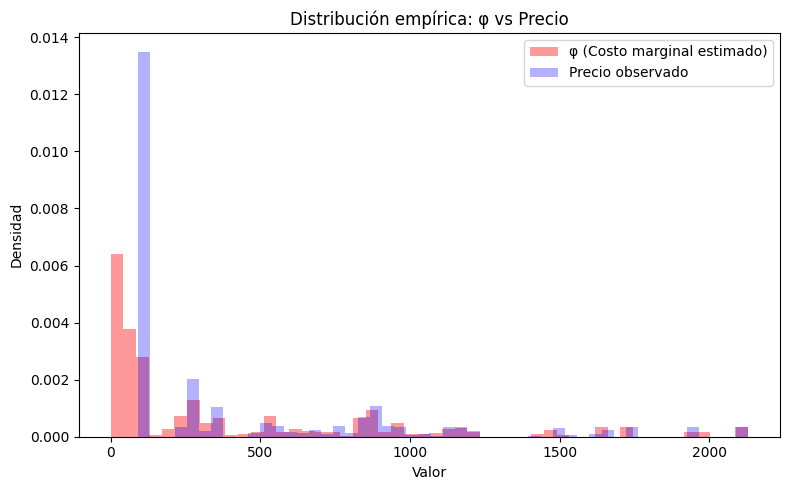

In [44]:
phi = pd.to_numeric(df_grouped['phi'], errors='coerce').replace([np.inf, -np.inf], np.nan).dropna()
precio = pd.to_numeric(df_grouped['precio_d'], errors='coerce').replace([np.inf, -np.inf], np.nan).dropna()

plt.figure(figsize=(8,5))
plt.hist(phi, bins=50, density=True, color="red", alpha=0.4, label="φ (Costo marginal estimado)")
plt.hist(precio, bins=50, density=True, color="blue", alpha=0.3, label="Precio observado")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.title("Distribución empírica: φ vs Precio")
plt.legend()
plt.tight_layout()
plt.show()

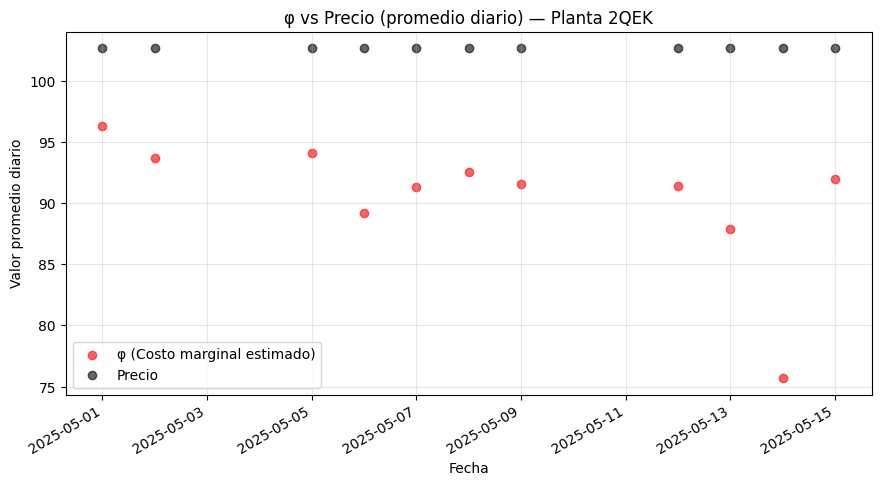

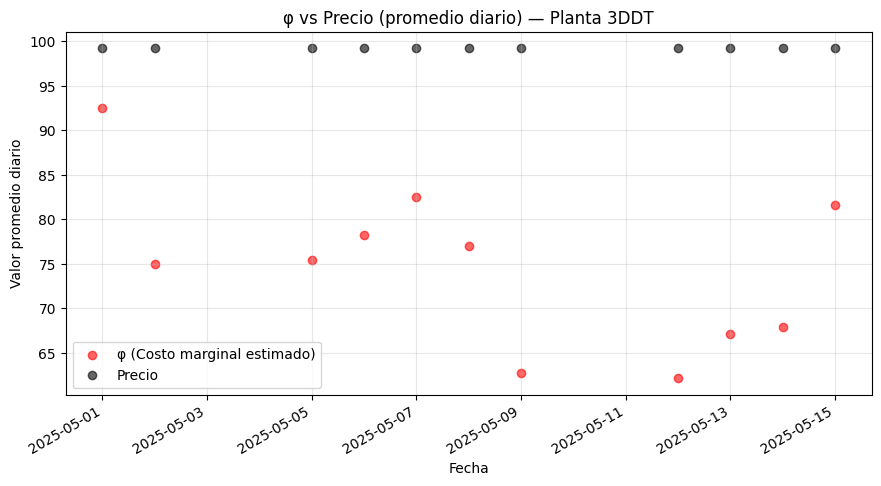

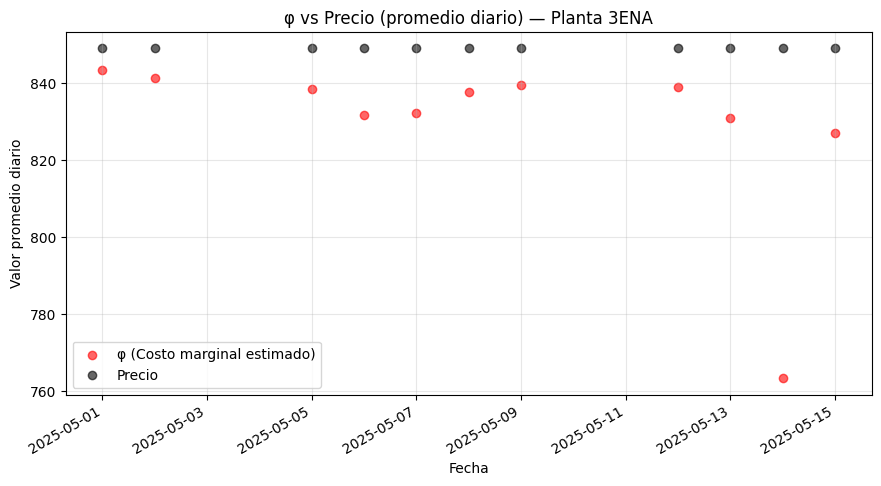

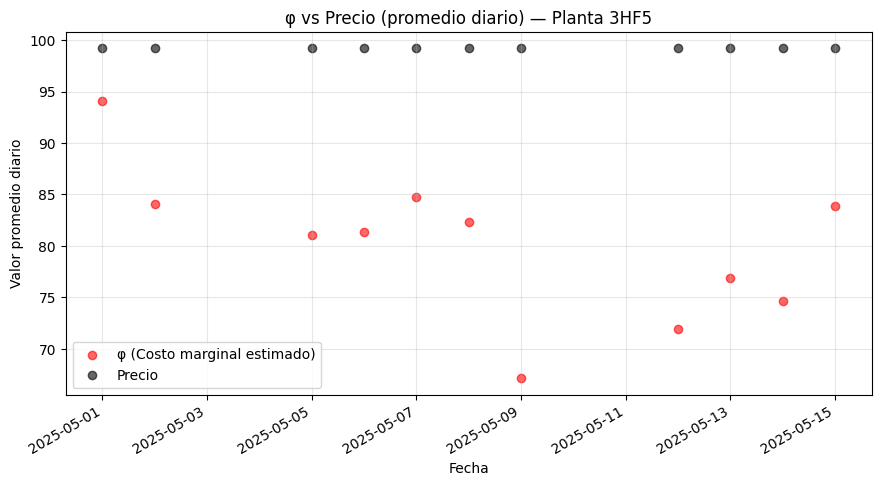

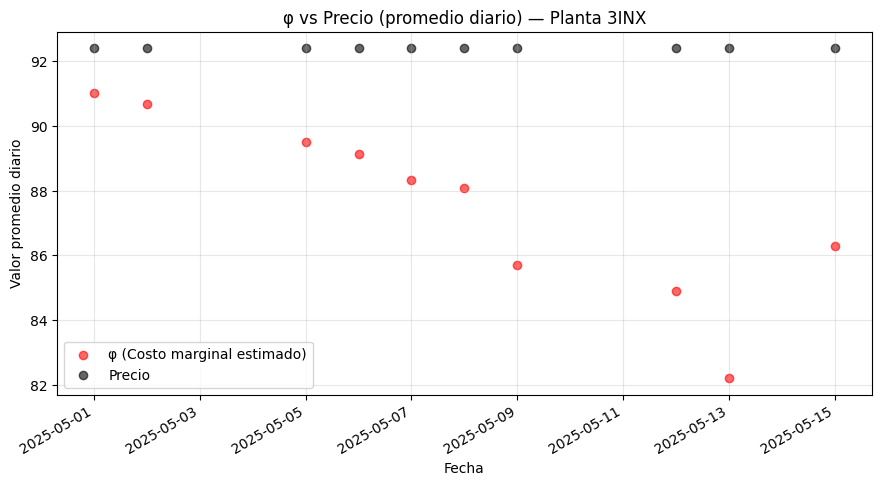

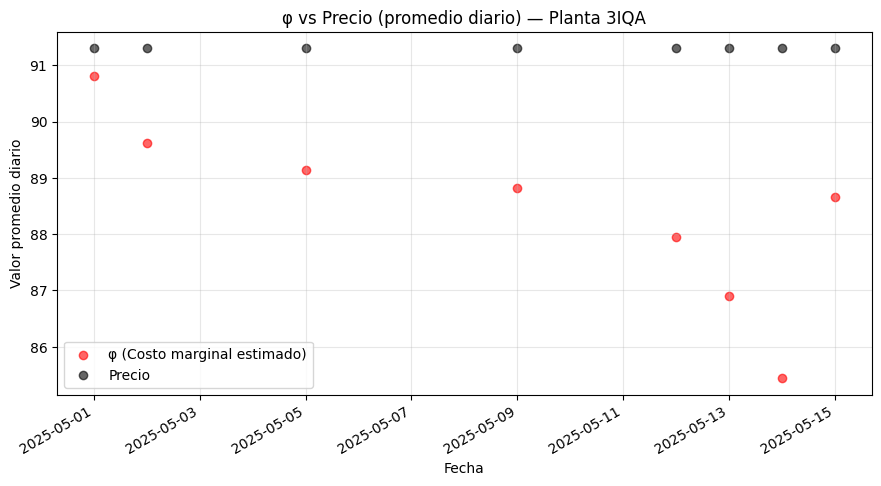

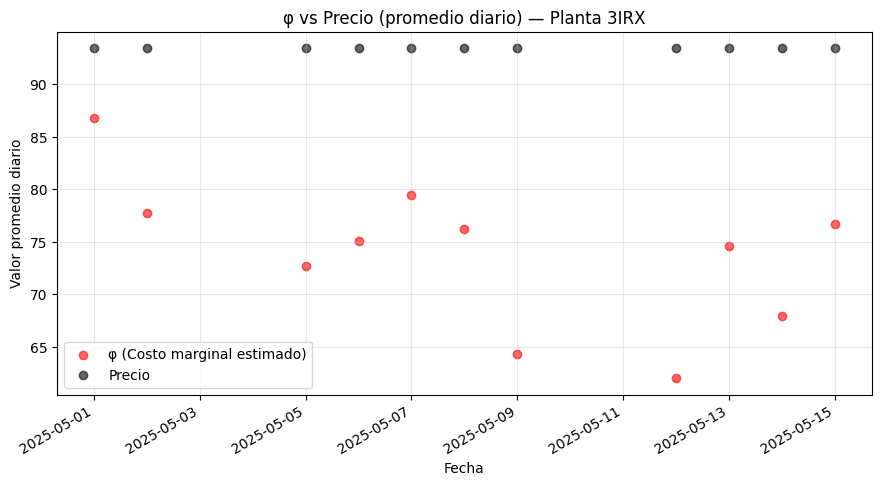

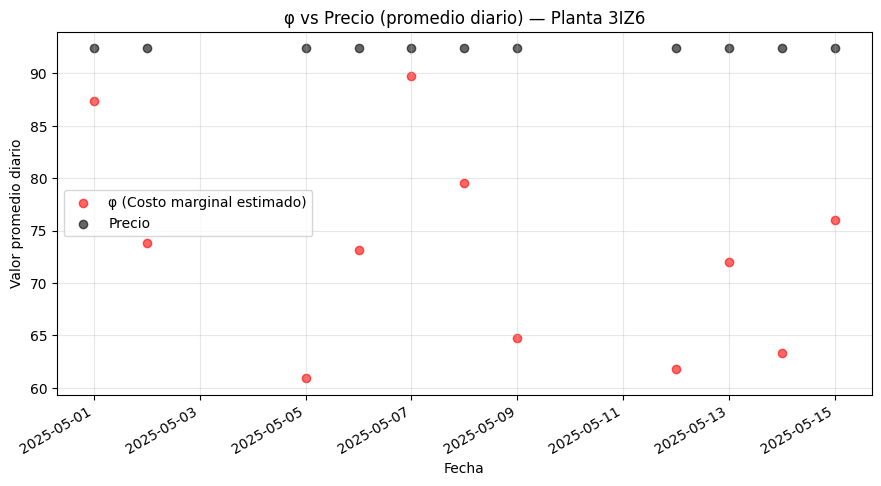

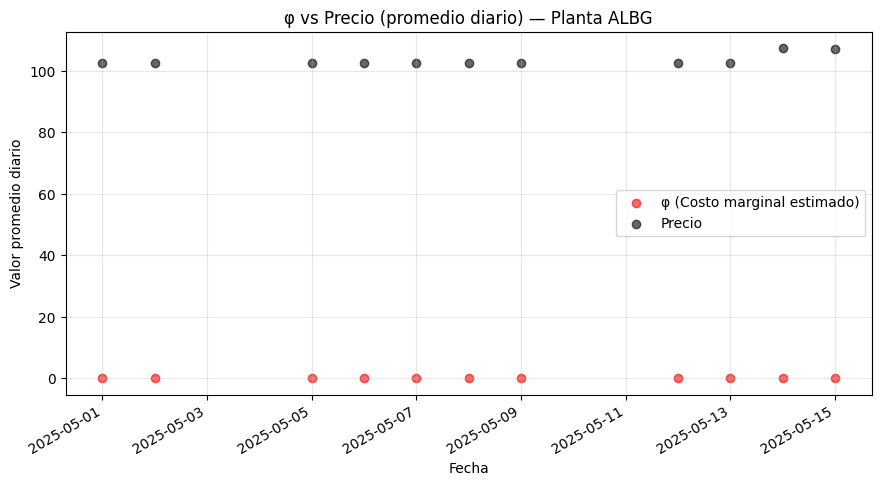

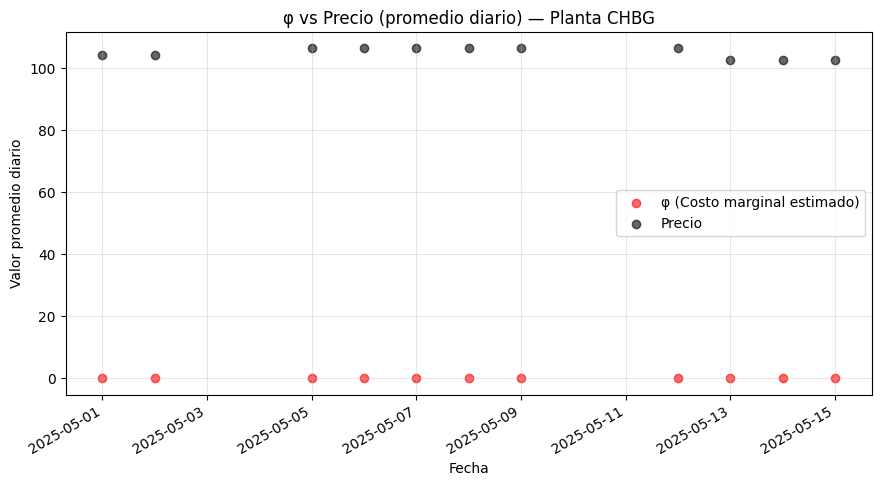

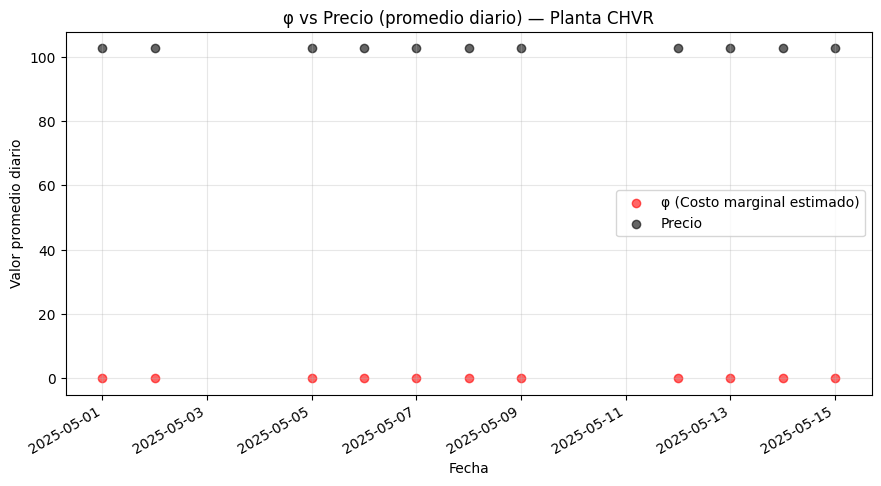

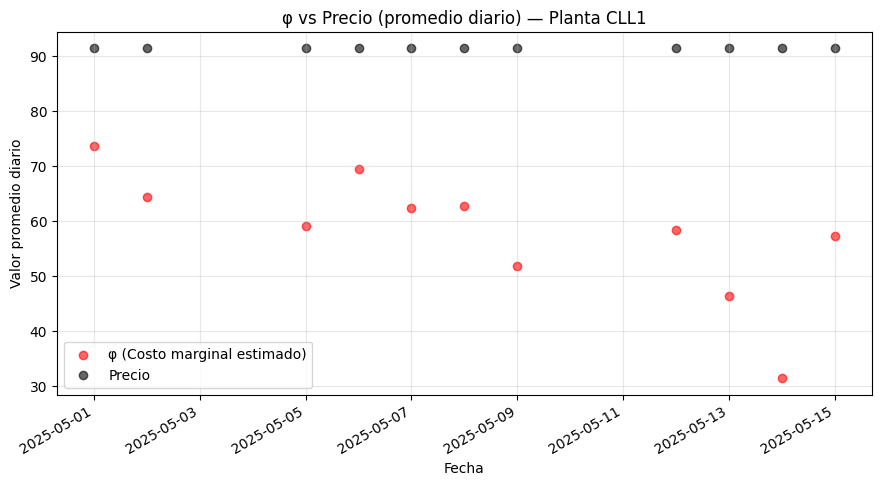

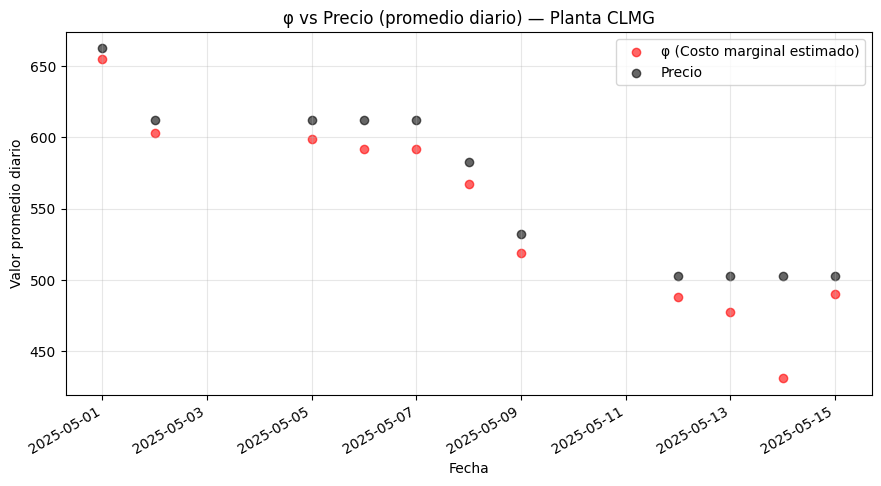

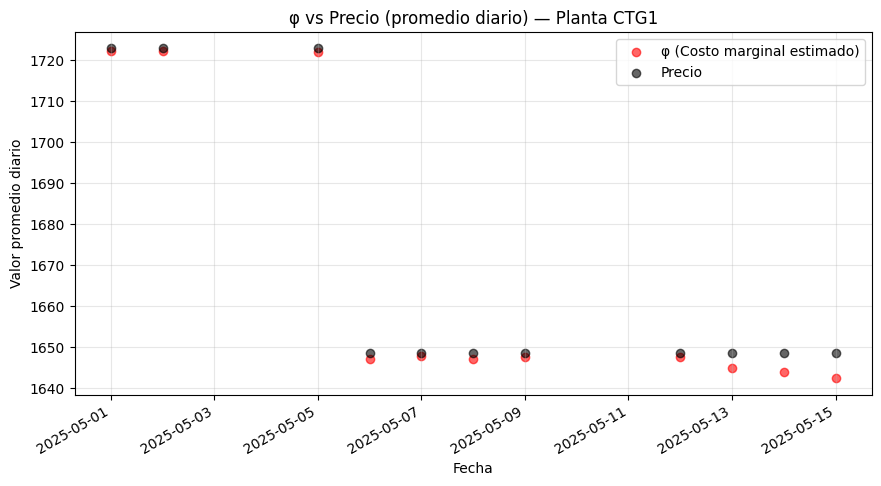

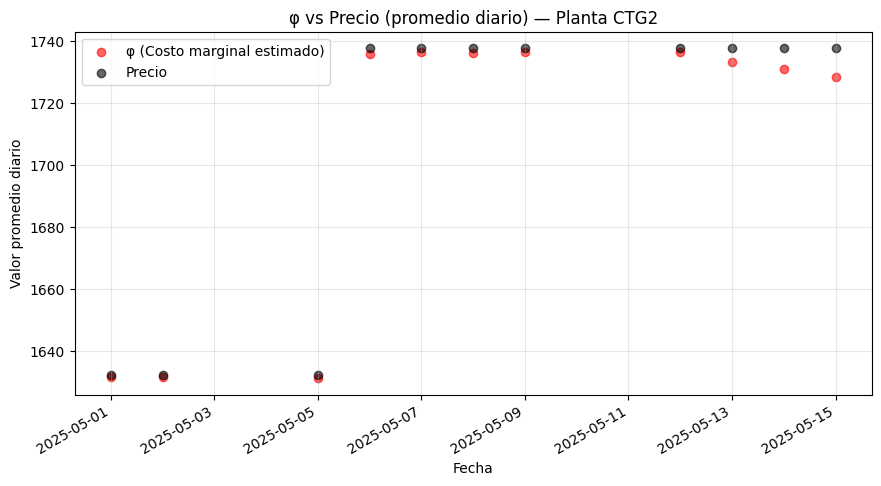

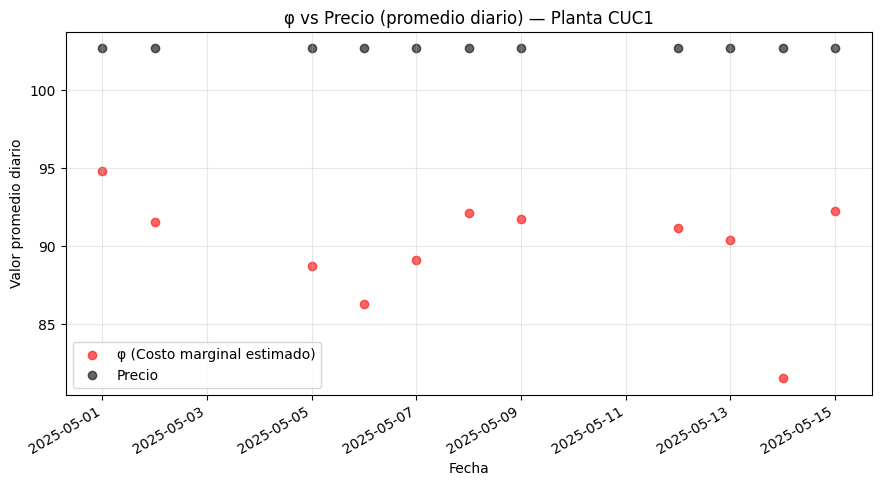

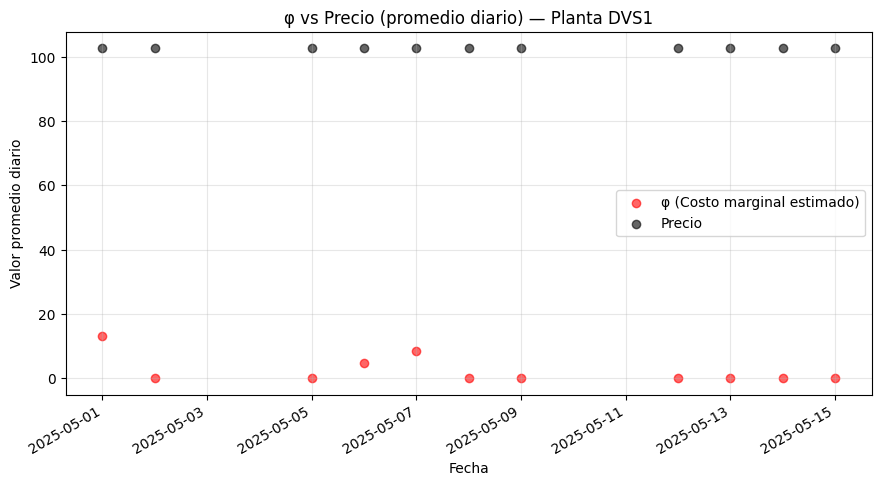

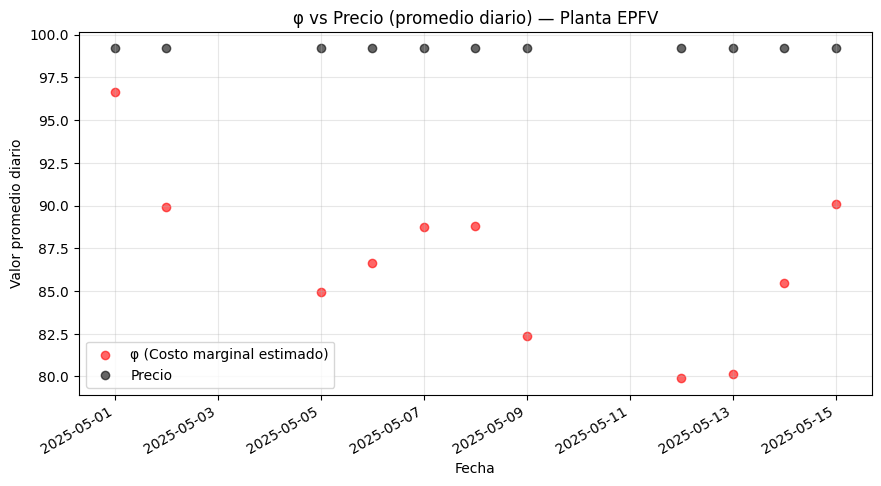

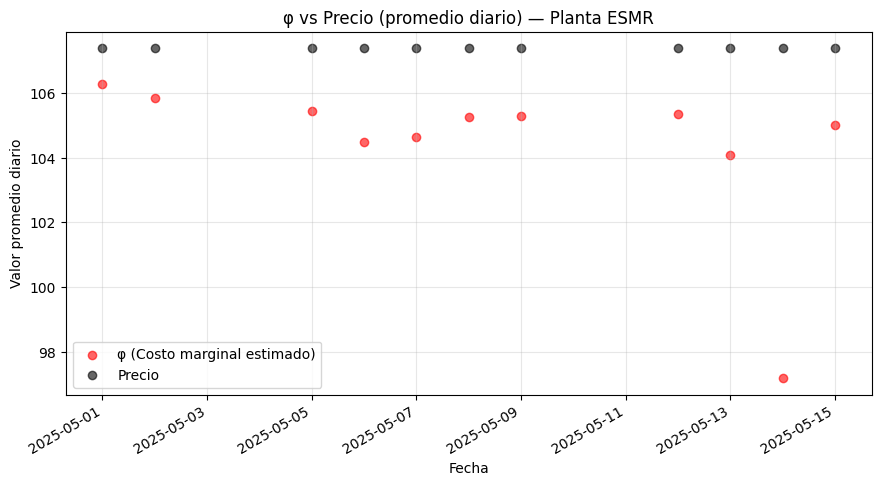

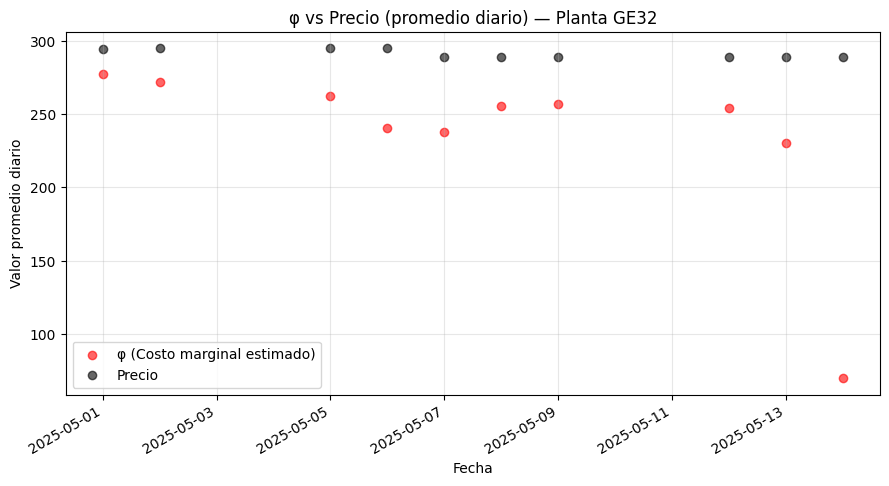

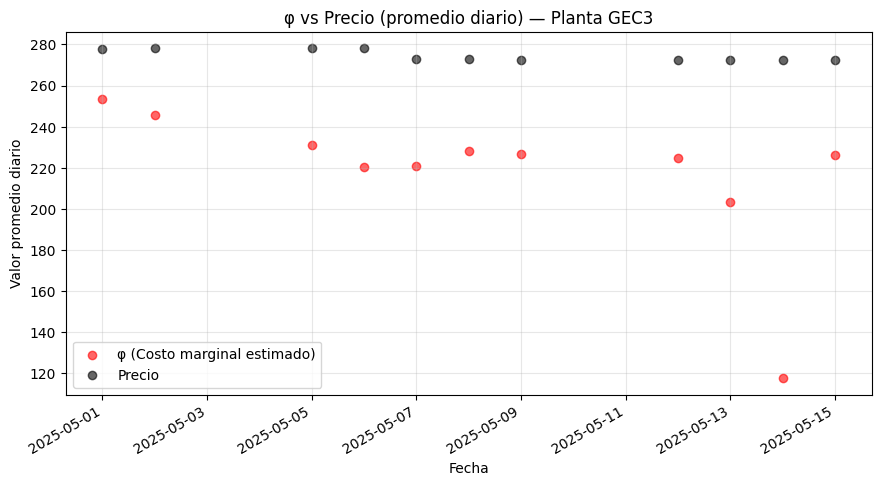

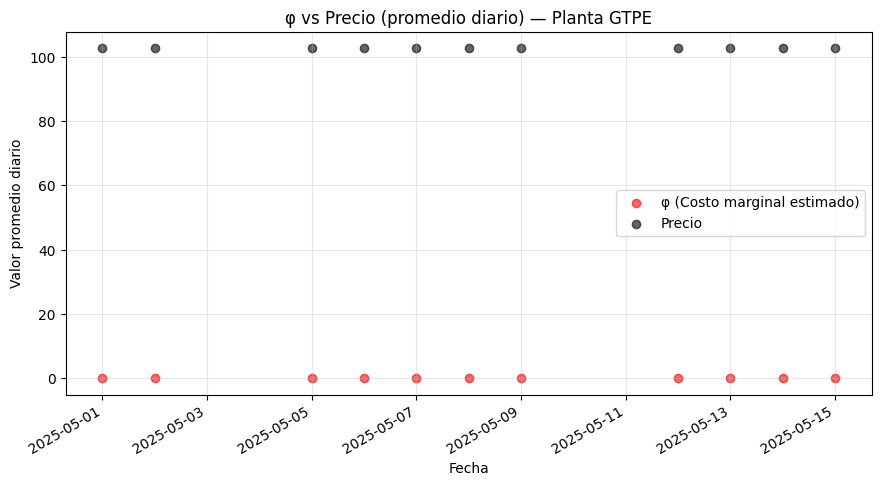

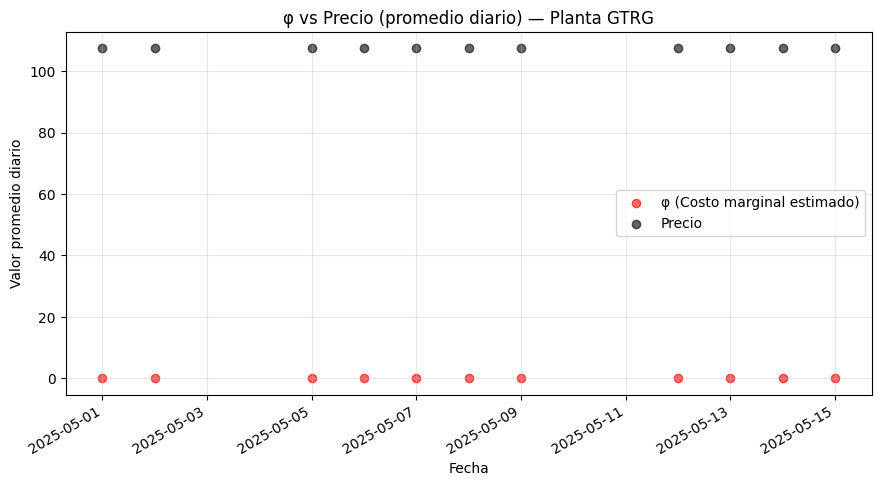

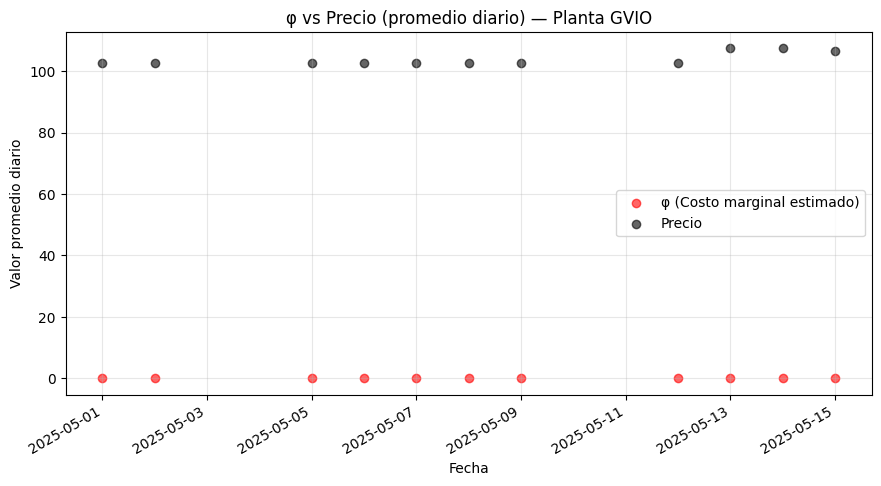

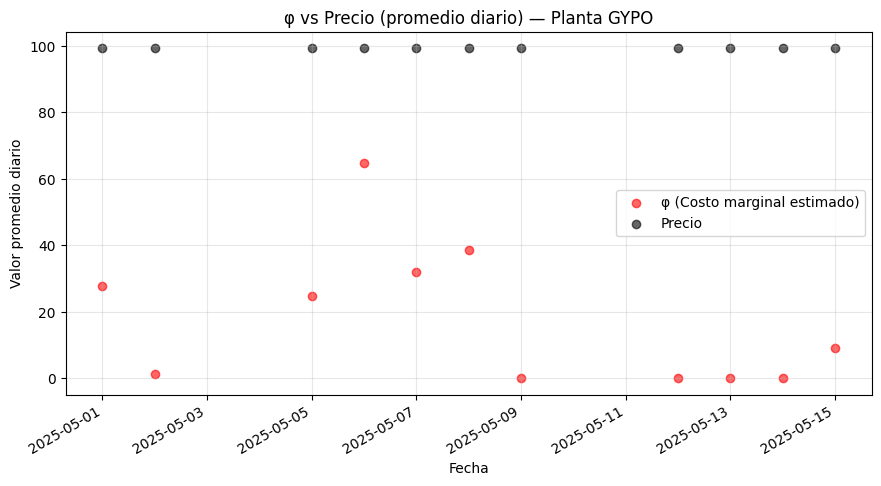

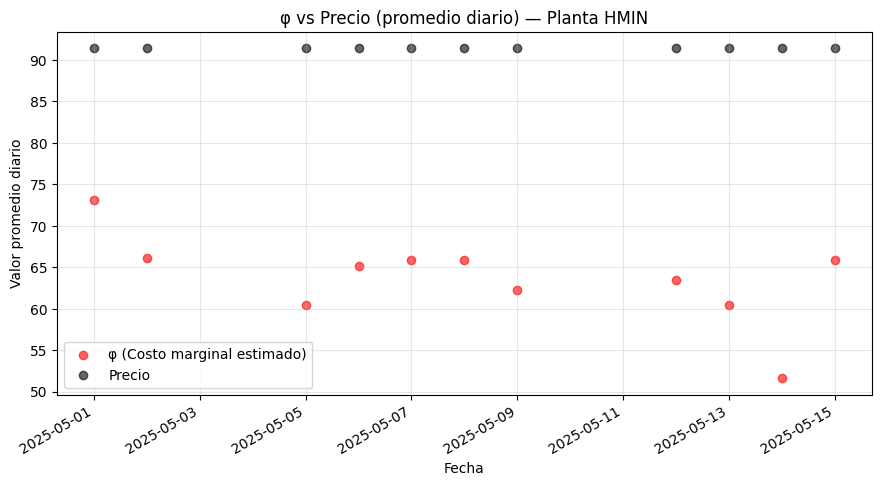

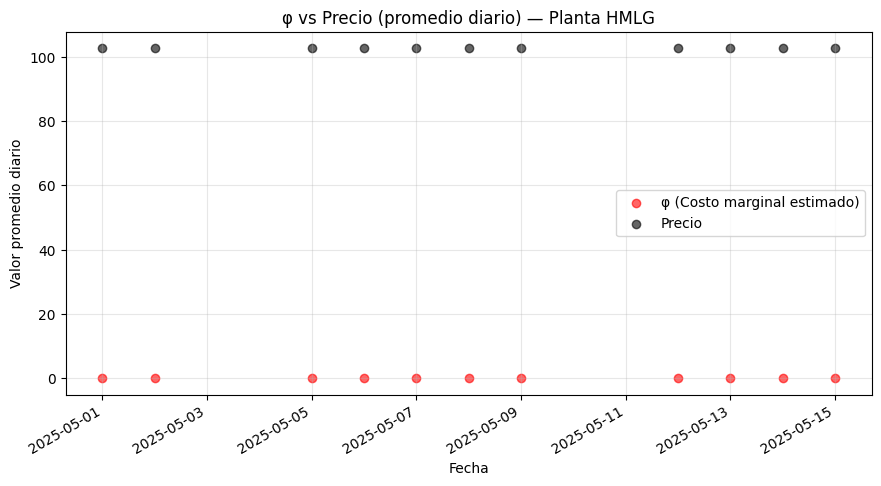

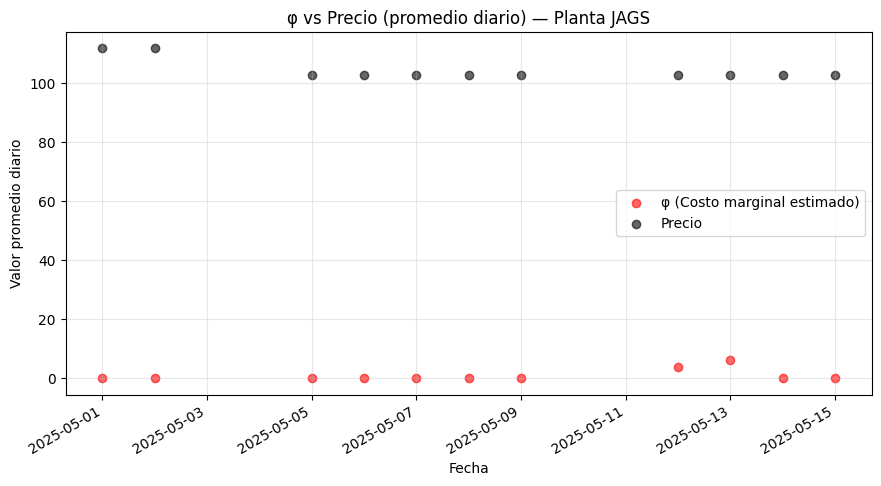

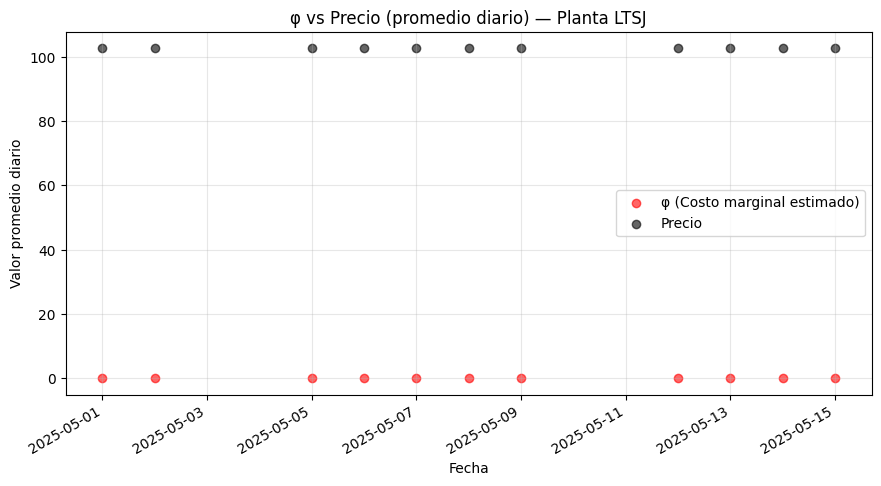

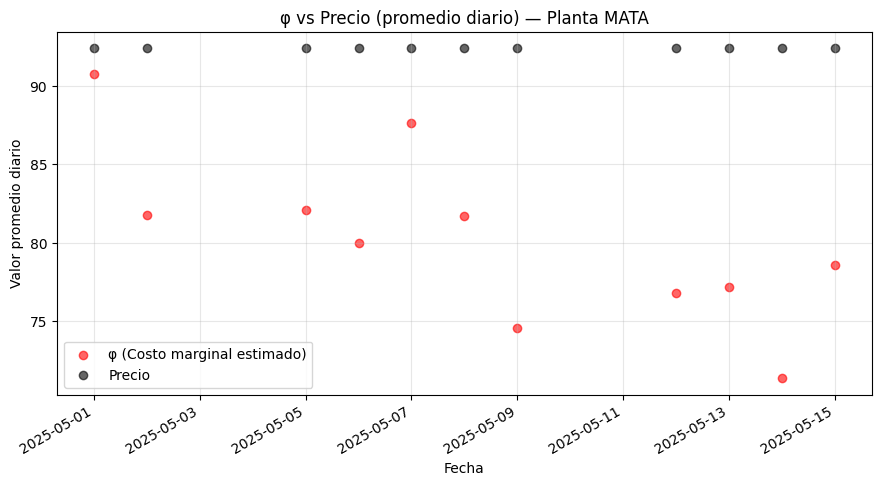

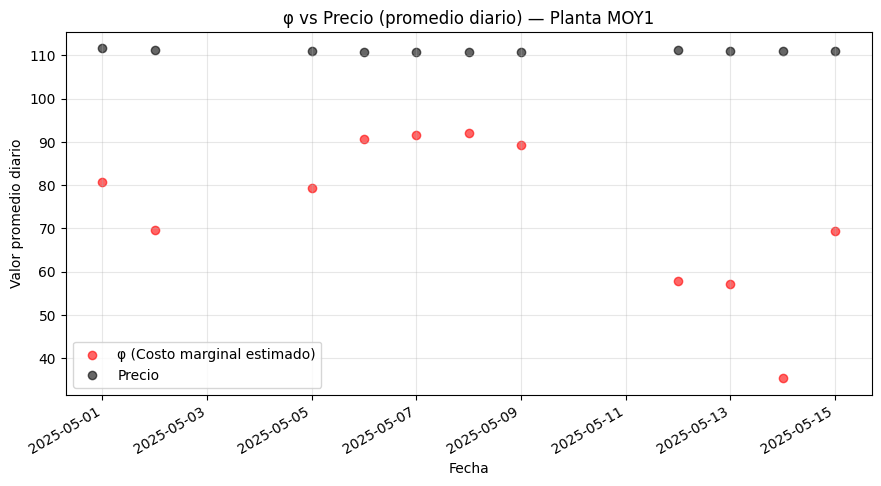

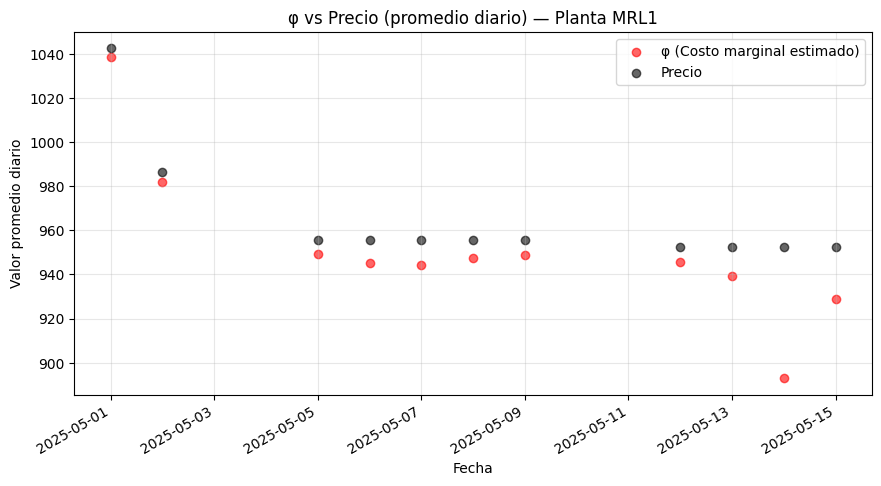

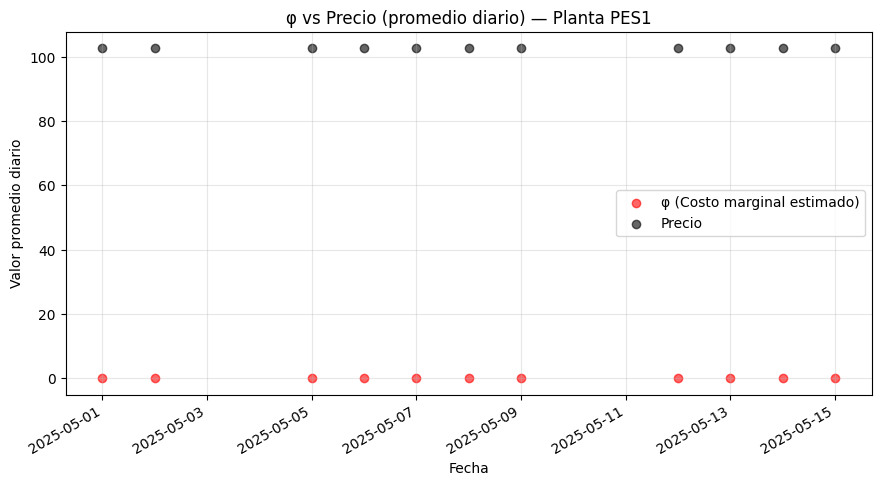

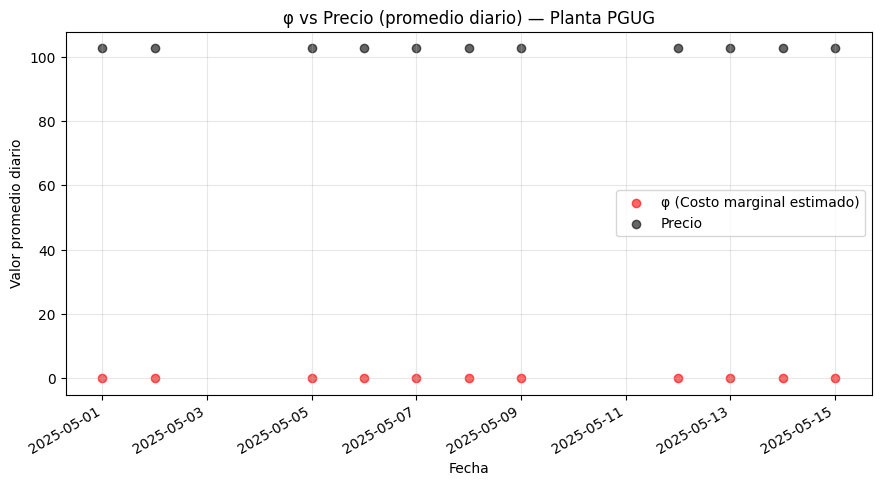

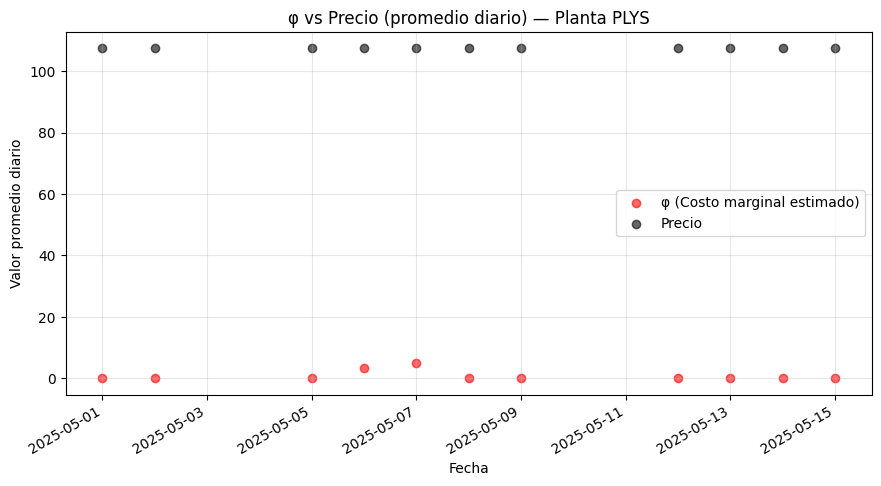

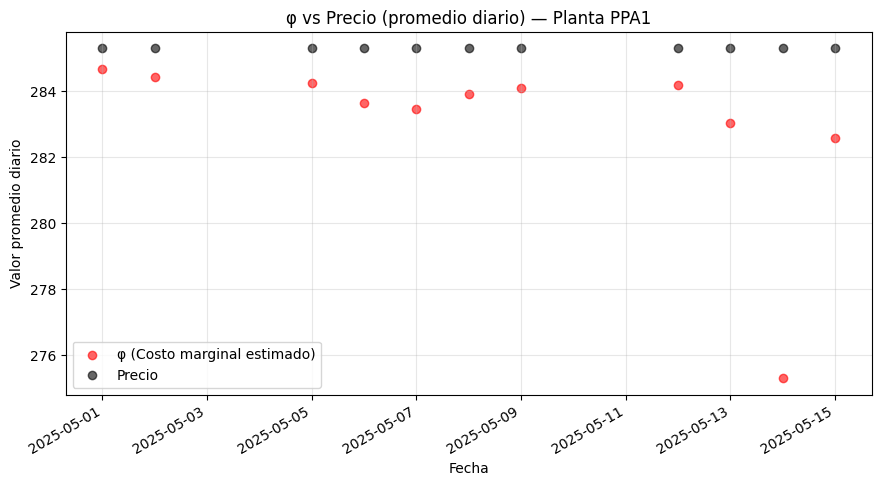

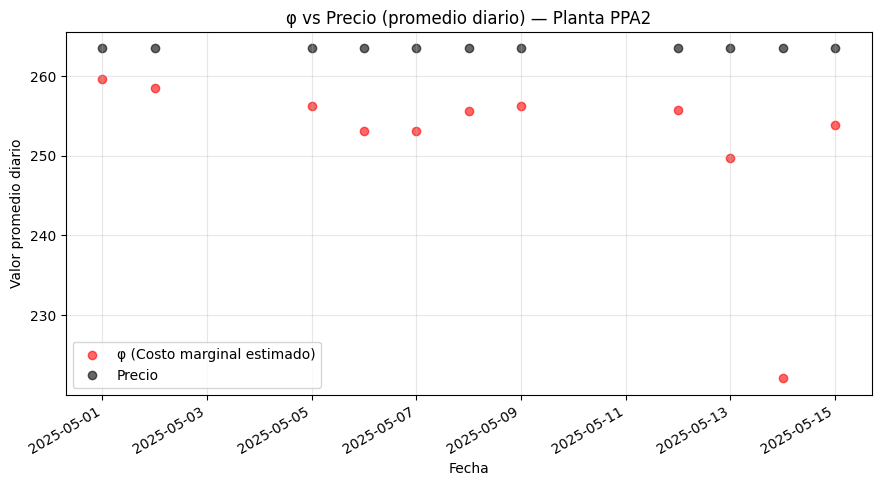

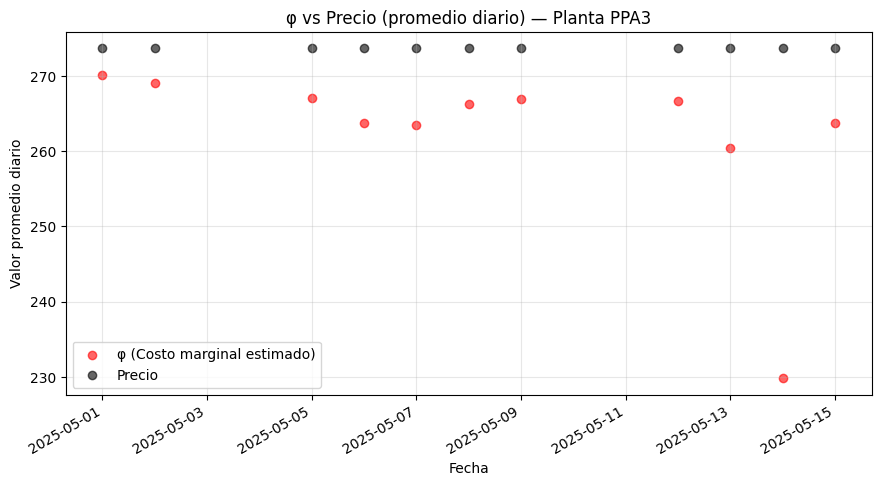

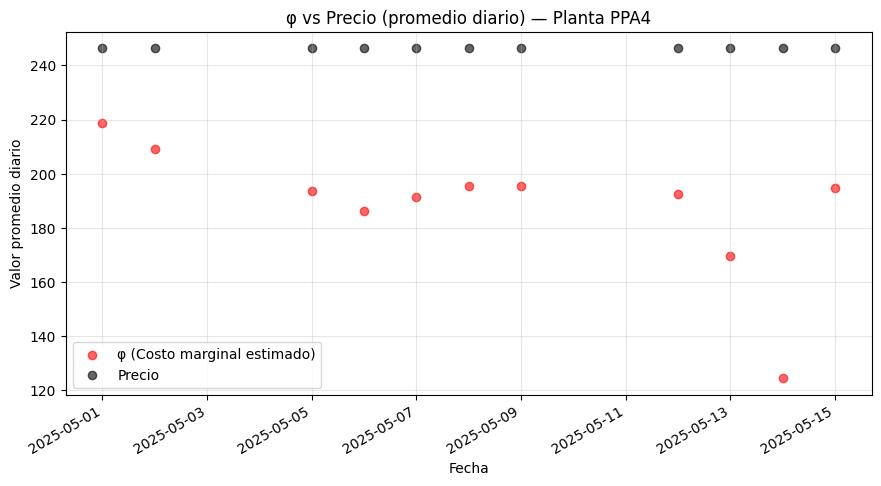

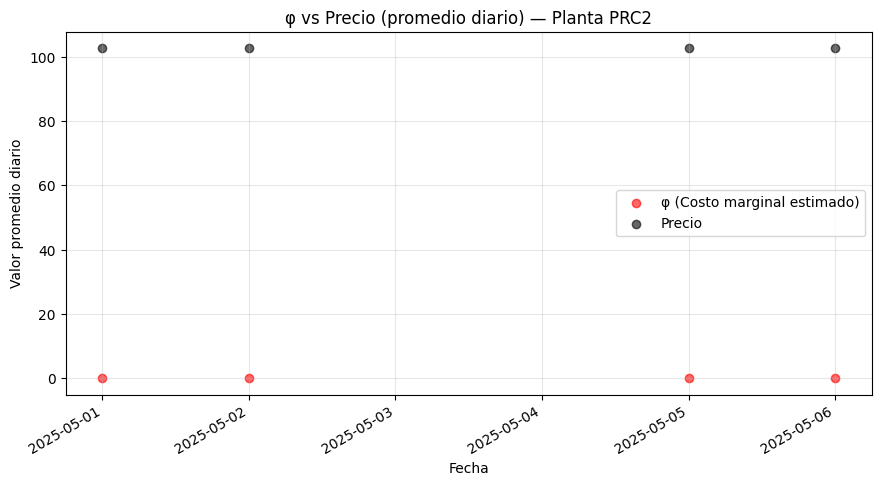

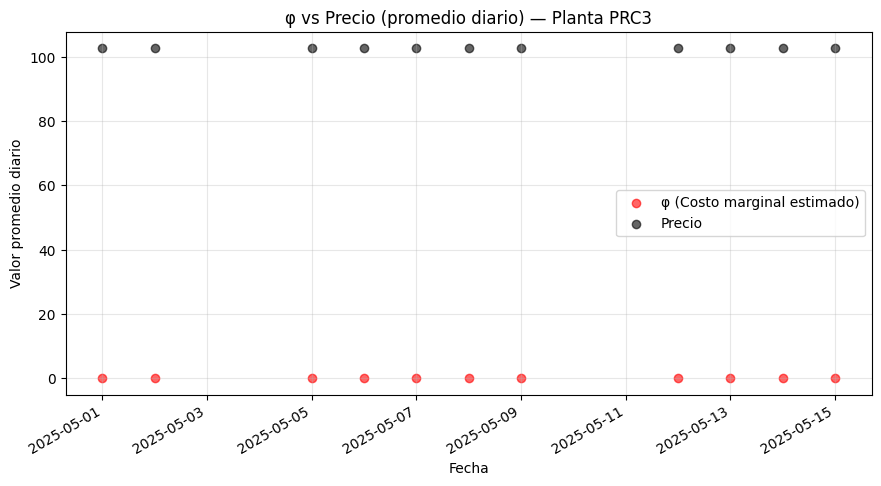

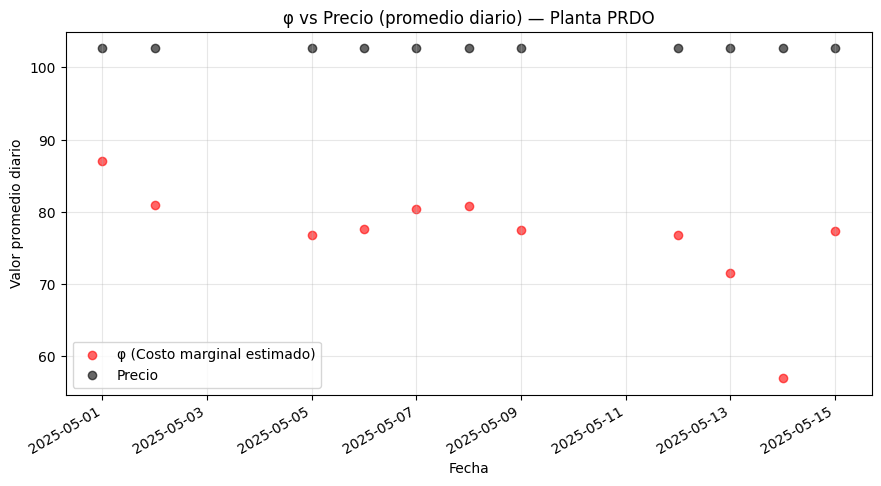

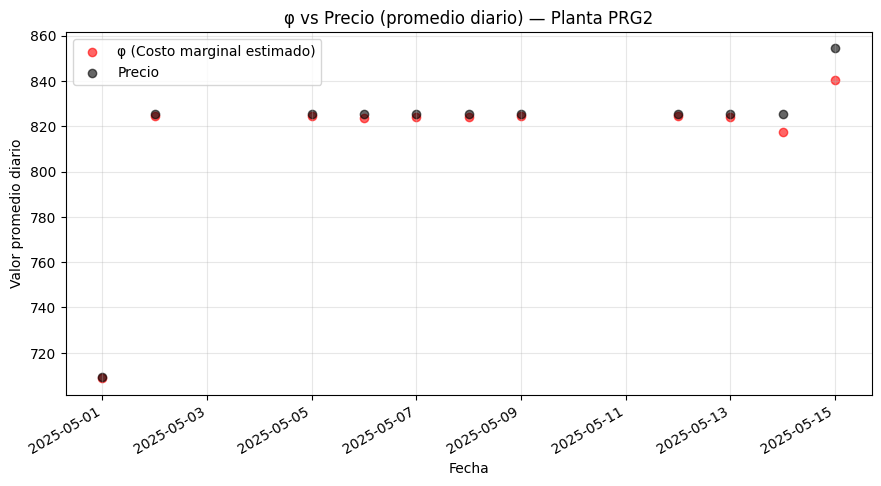

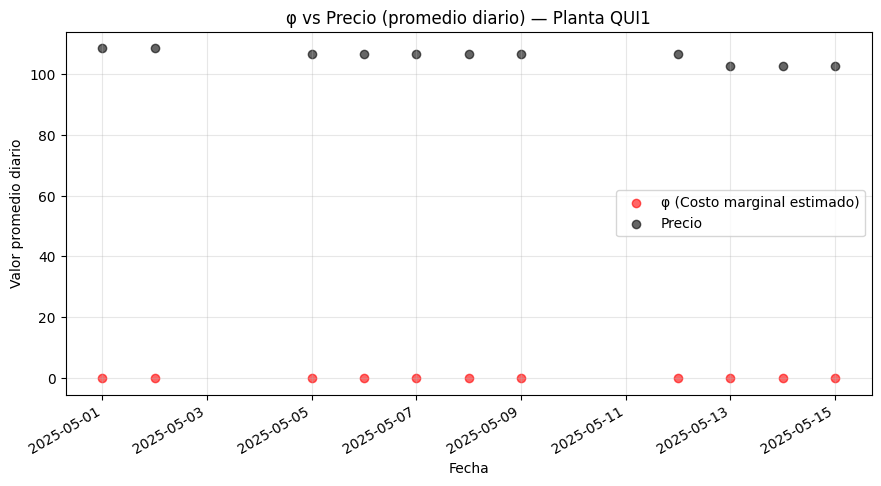

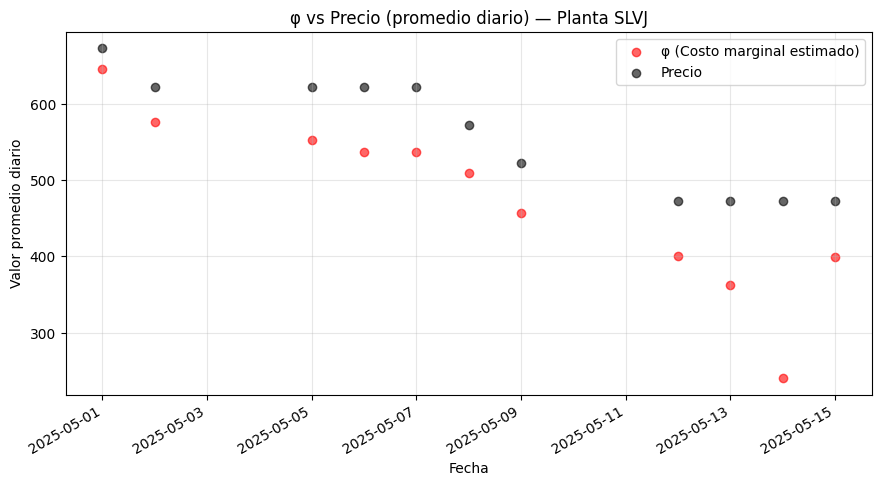

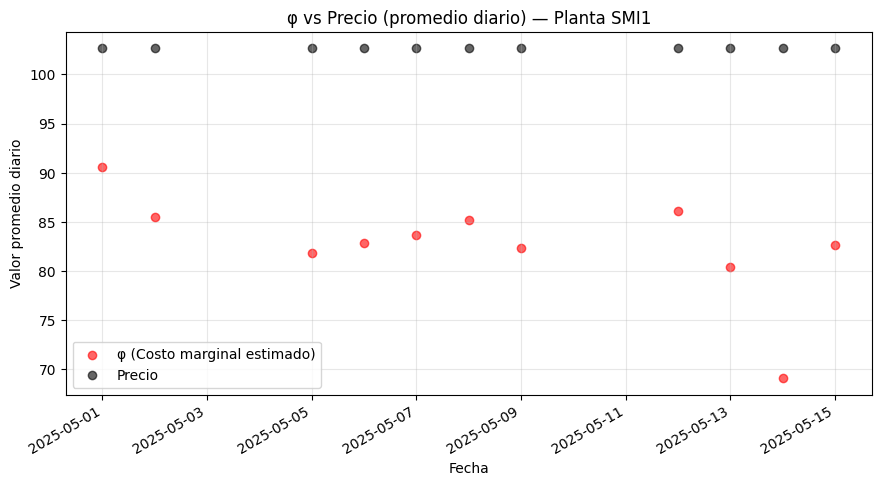

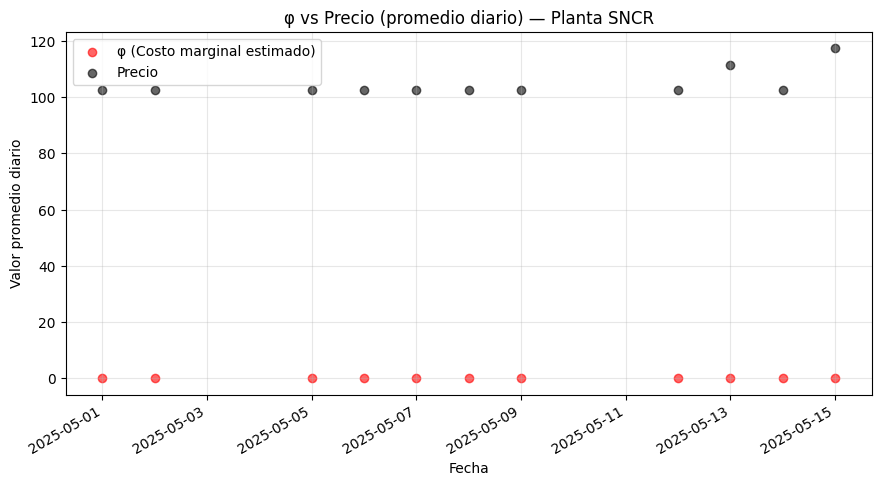

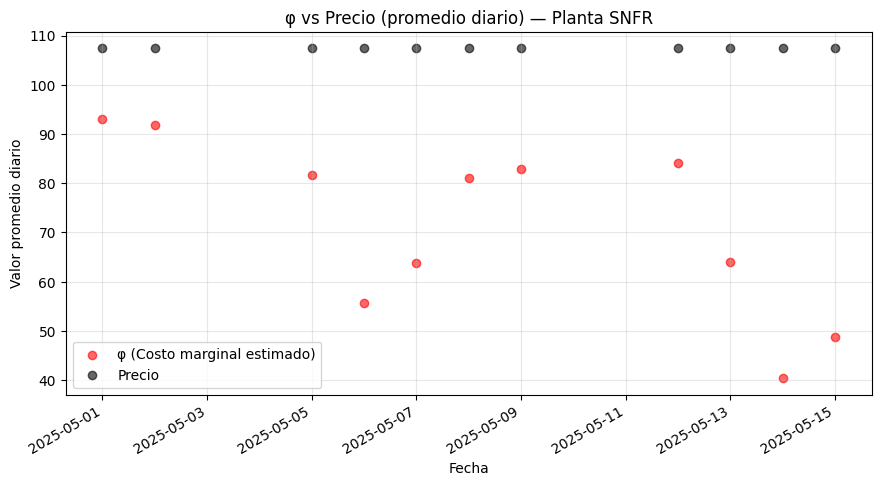

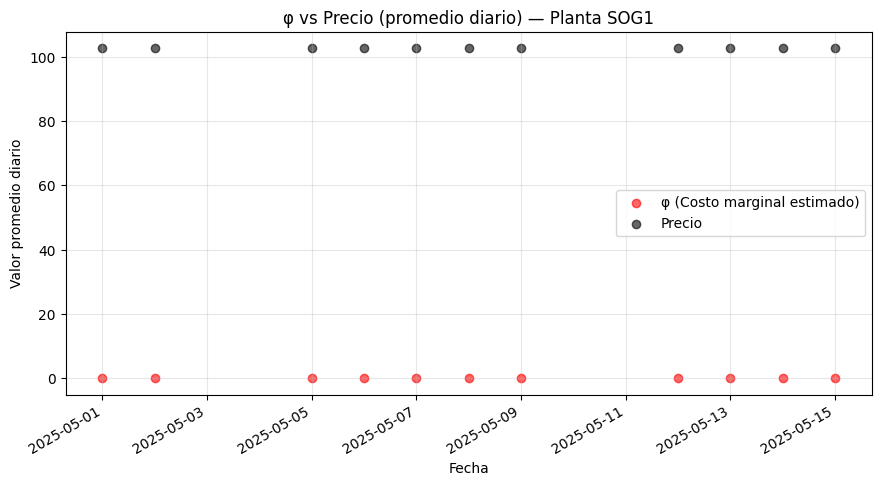

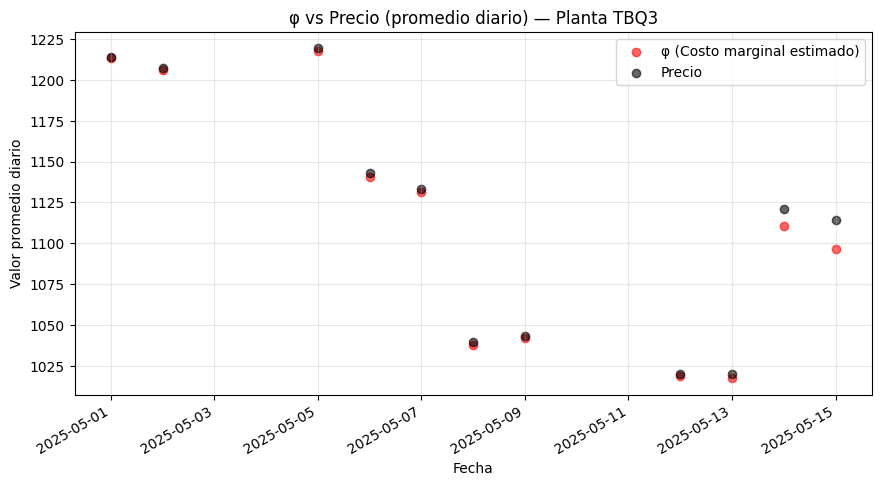

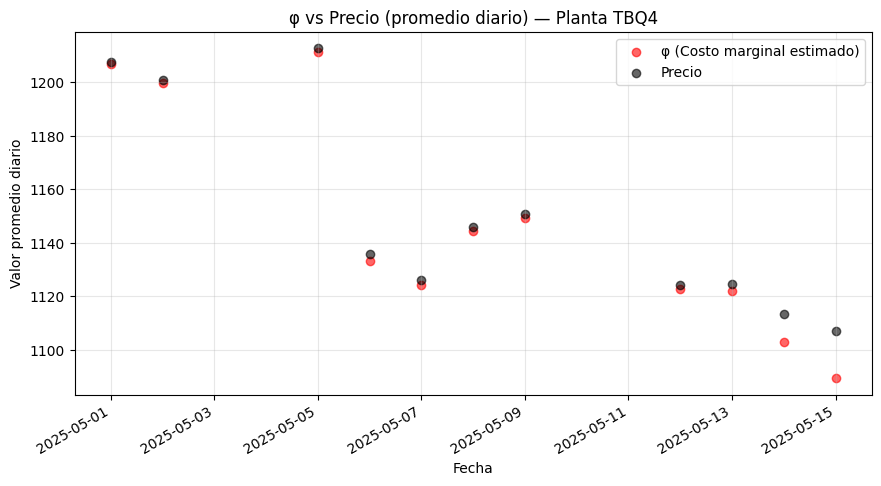

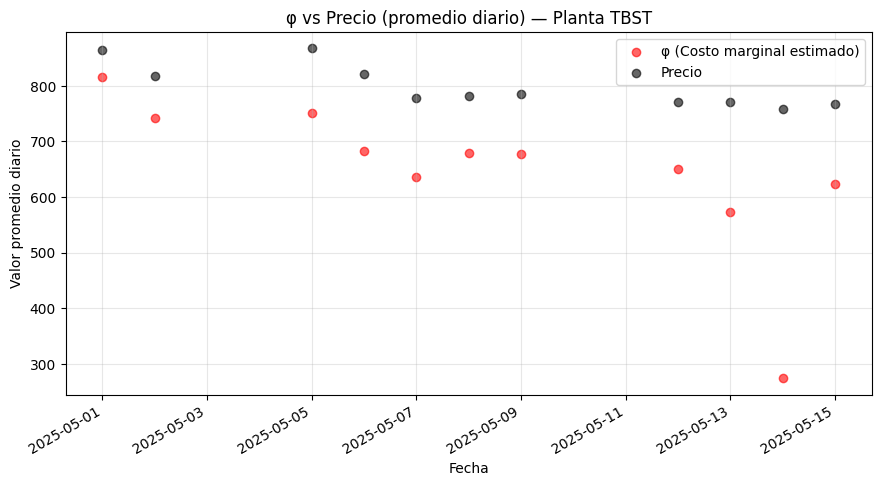

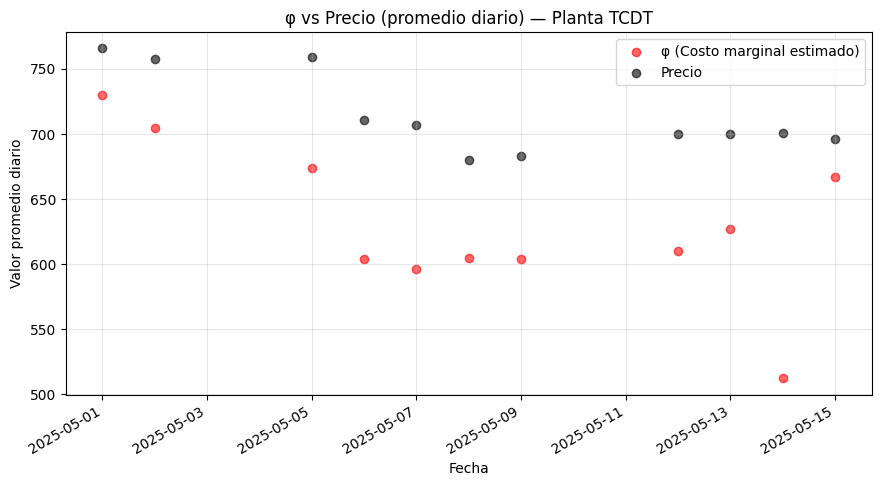

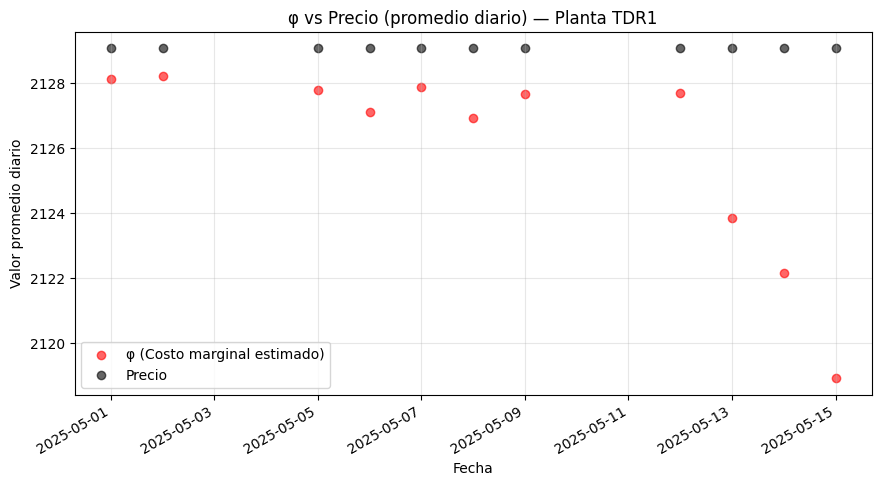

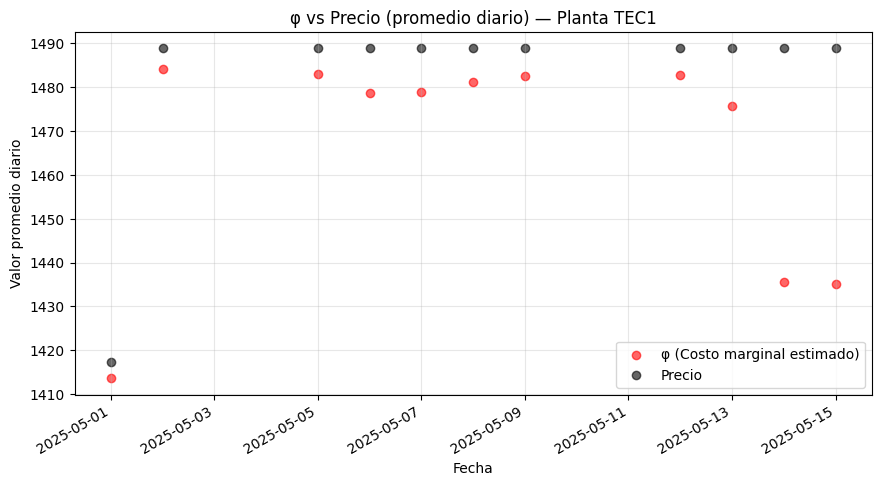

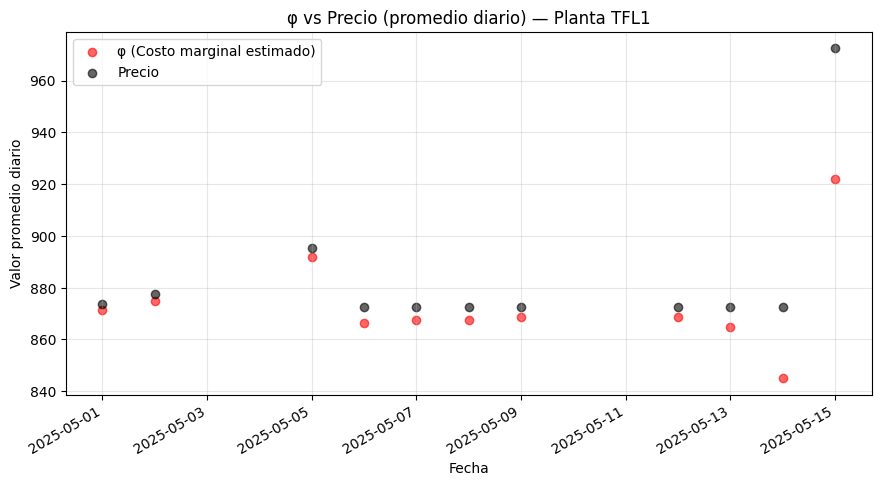

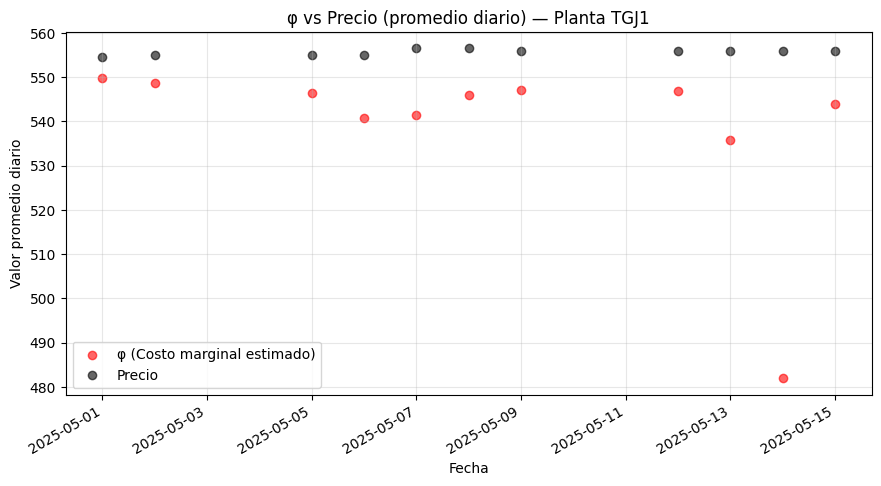

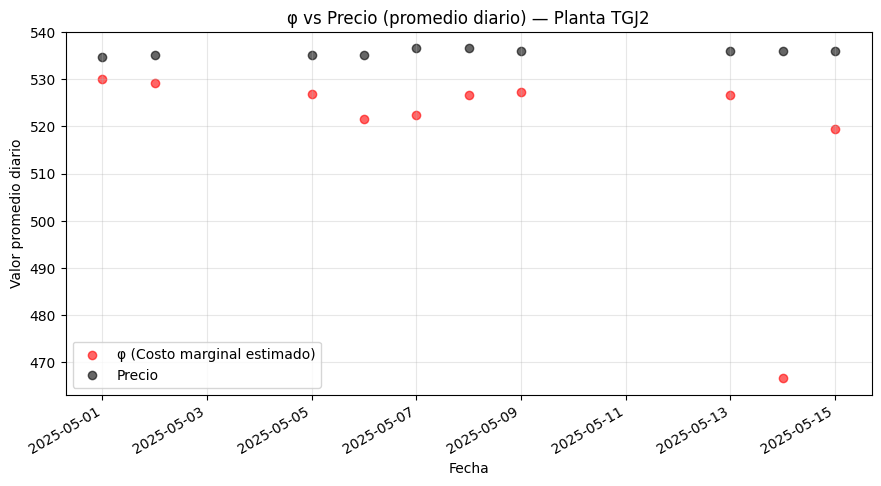

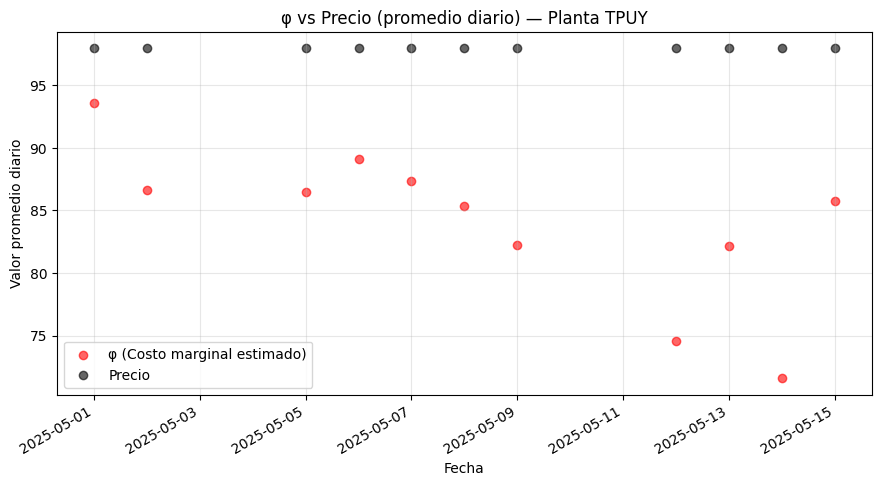

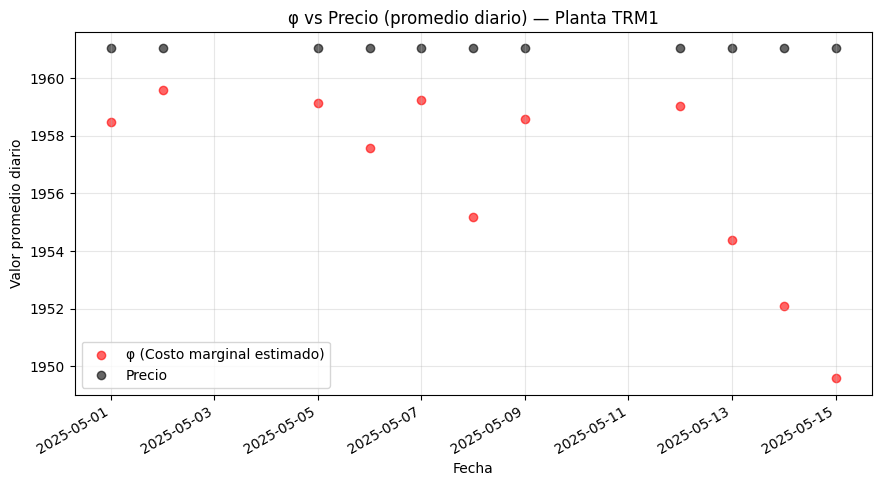

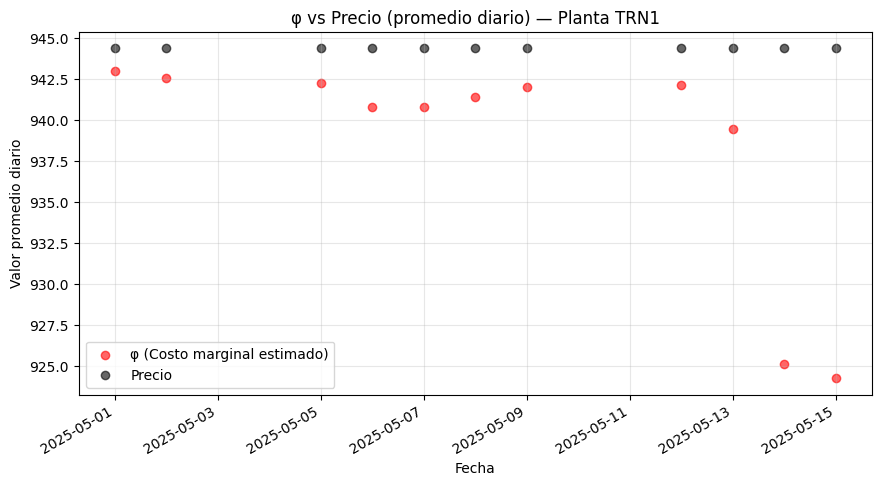

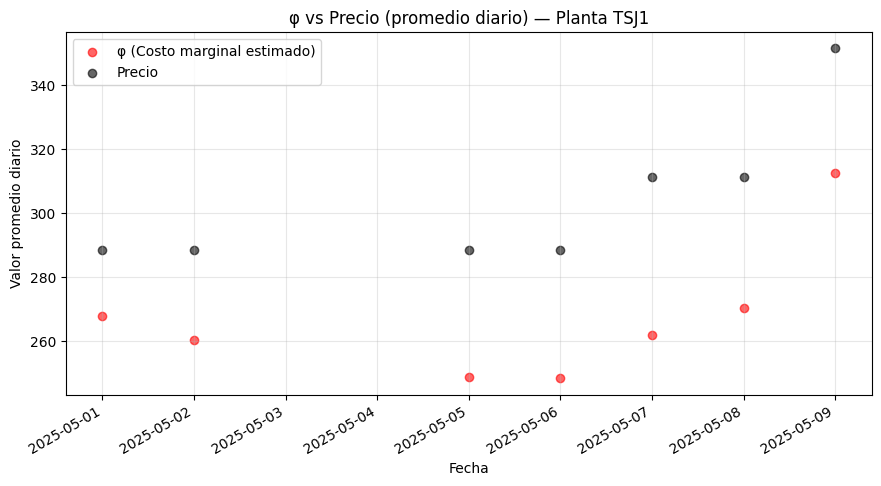

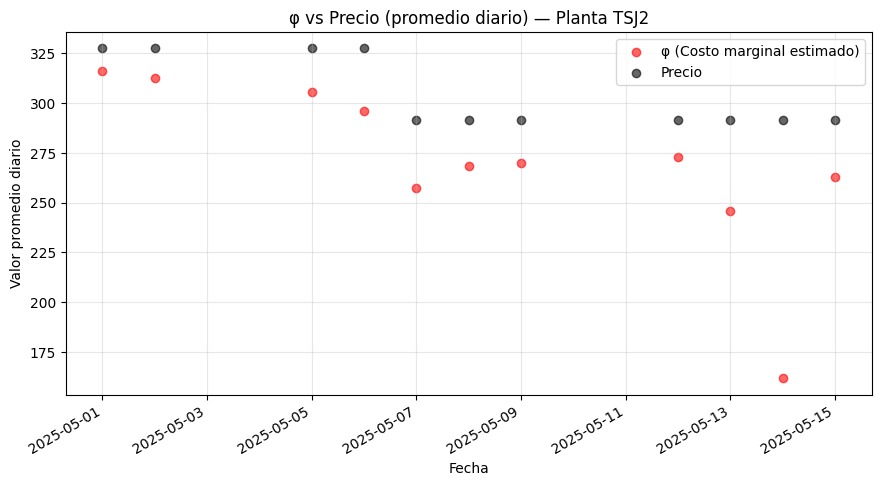

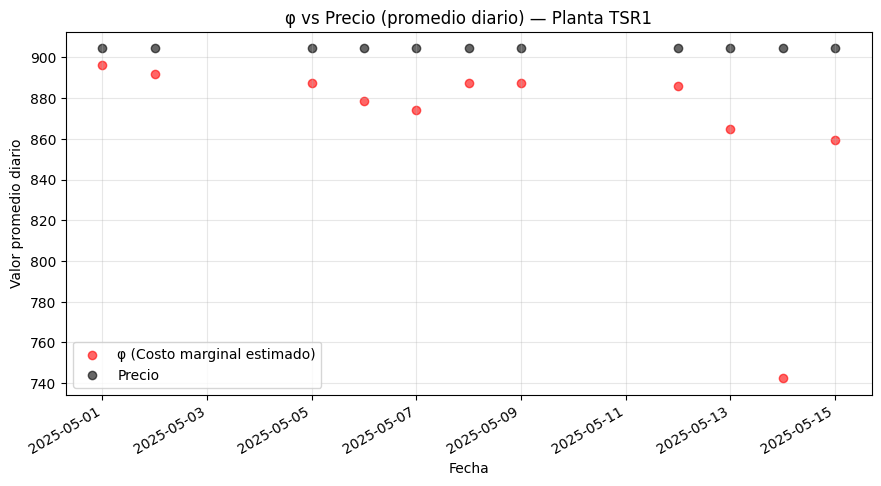

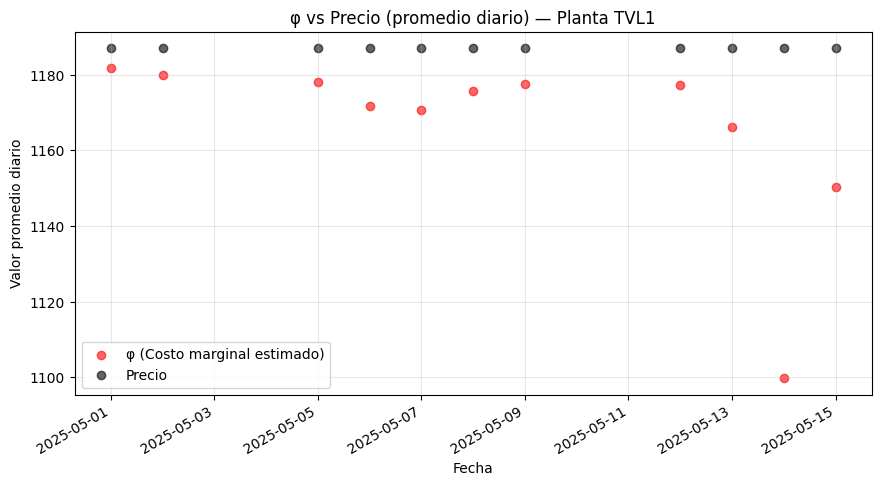

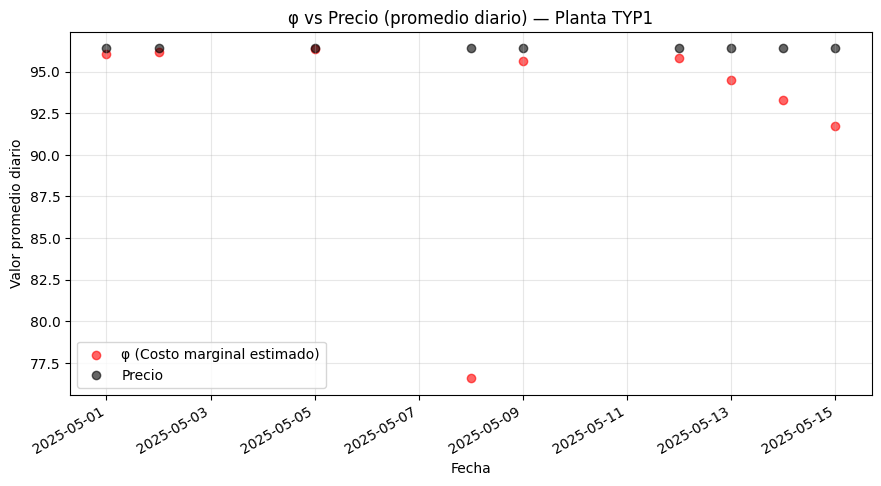

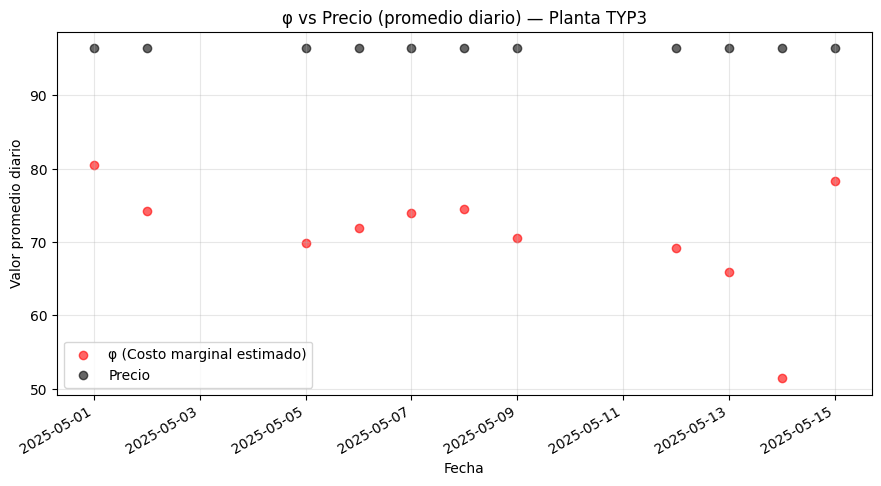

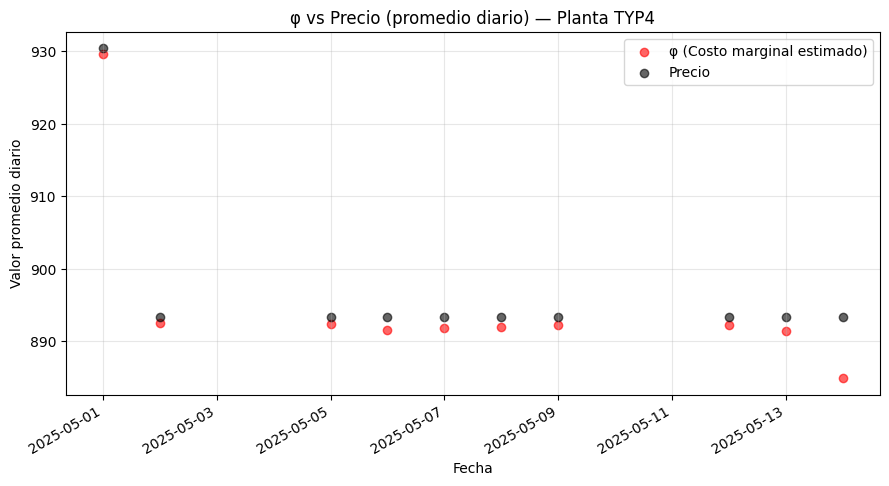

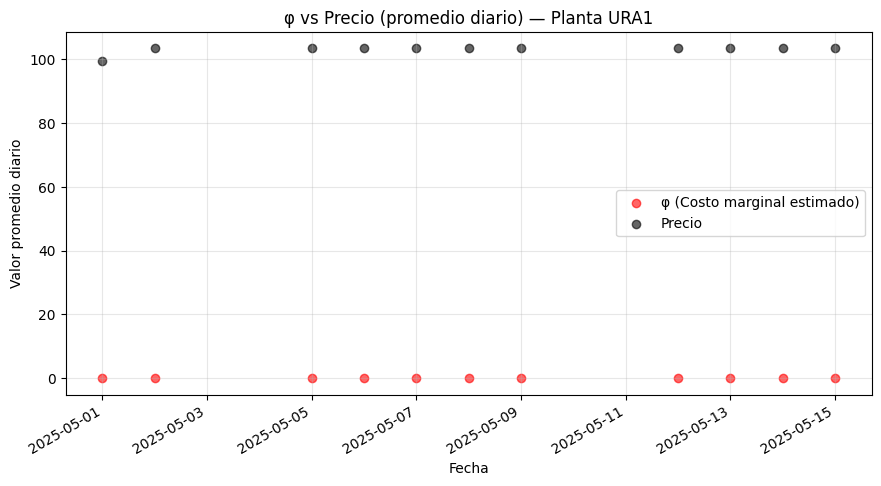

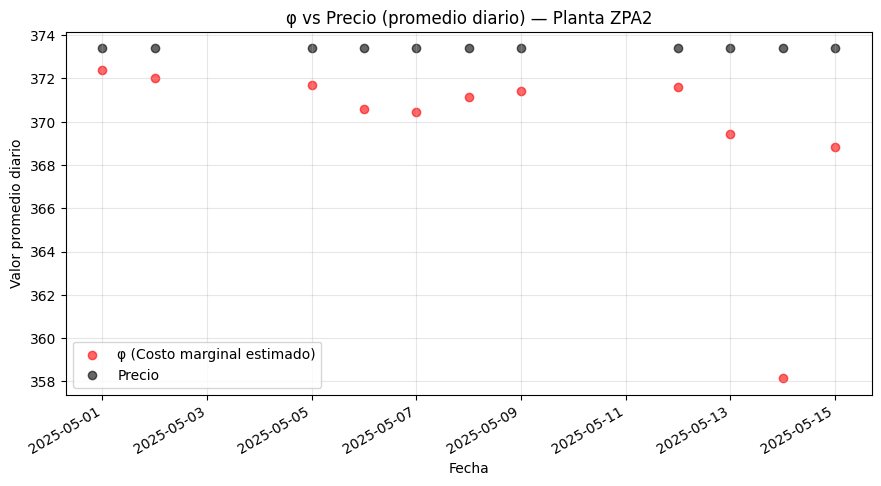

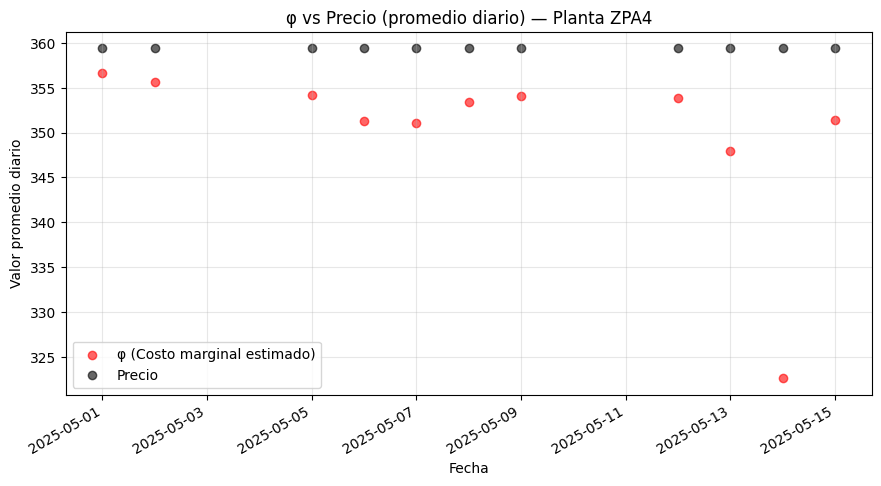

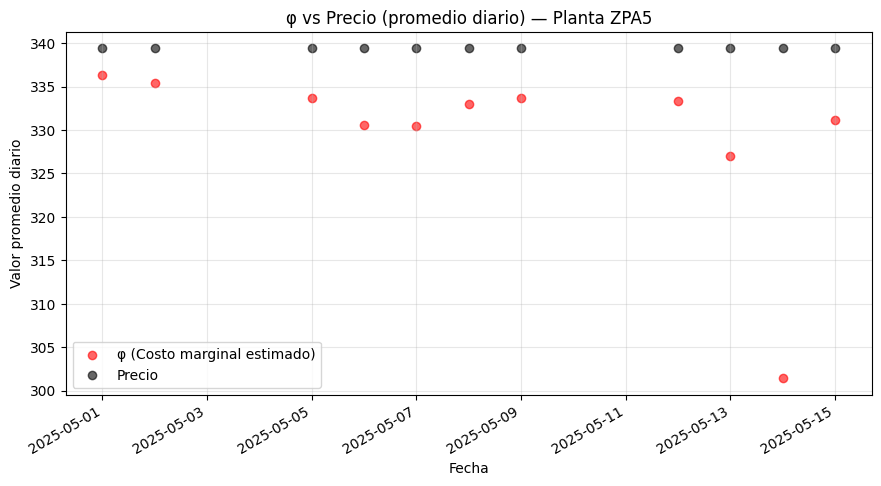

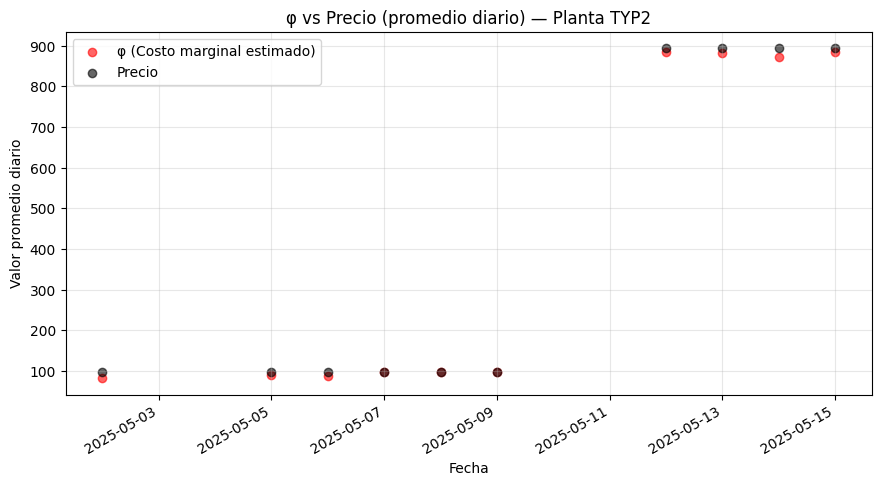

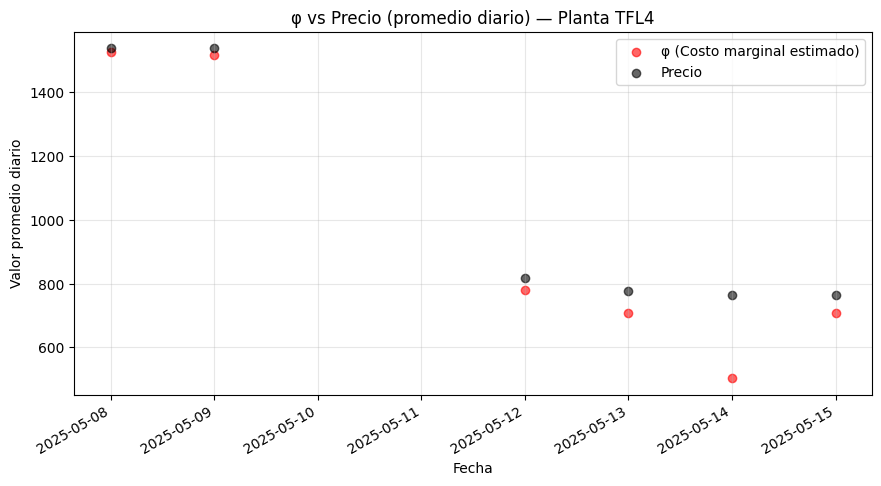

In [45]:

# --- Filtrar filas válidas ---
df_grouped = df_grouped.dropna(subset=['Fecha', 'CodigoPlanta', 'phi_agg', 'precio_d'])

# --- Iterar sobre cada planta ---
for planta in df_grouped['CodigoPlanta'].unique():
    df_planta = (
        df_grouped[df_grouped['CodigoPlanta'] == planta]
        .groupby('Fecha', as_index=False)[['phi', 'precio_d']].mean()
        .sort_values('Fecha')
    )

    plt.figure(figsize=(9, 5))
    plt.scatter(df_planta['Fecha'], df_planta['phi'], color='red', label='φ (Costo marginal estimado)', alpha=0.6)
    plt.scatter(df_planta['Fecha'], df_planta['precio_d'], color='black', label='Precio', alpha=0.6)

    plt.xlabel("Fecha")
    plt.ylabel("Valor promedio diario")
    plt.title(f"φ vs Precio (promedio diario) — Planta {planta}")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.gcf().autofmt_xdate()

    # --- Guardar figura ---
    fecha_min_str = pd.to_datetime(df_planta['Fecha'].min()).strftime('%Y%m%d')
    fecha_max_str = pd.to_datetime(df_planta['Fecha'].max()).strftime('%Y%m%d')
    
    filename = f"phi_precio_{planta}_{fecha_min_str}_to_{fecha_max_str}_M{M}_consumaind.png"
    filepath = os.path.join(sub_dir, filename)
    
    #plt.savefig(filepath, dpi=300)
    plt.show()

   

    #print(f"✅ Gráfico guardado: {filepath}")


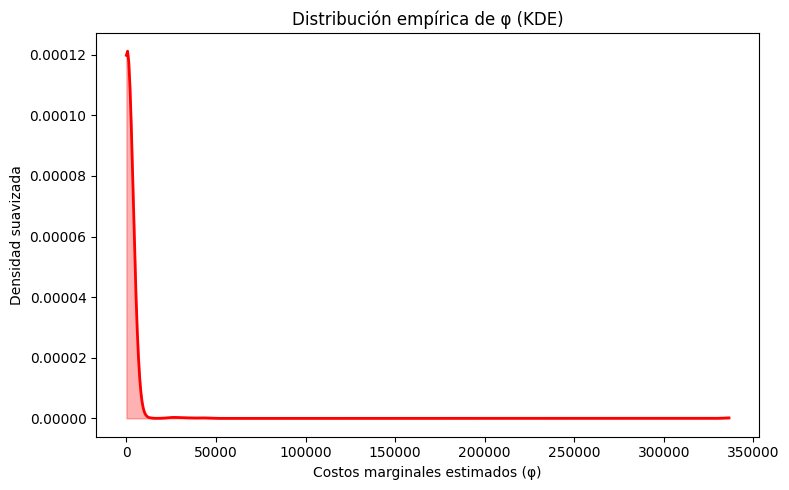

In [21]:

phi = pd.to_numeric(df_grouped['phi'], errors='coerce').dropna()

# Calcular densidad KDE
kde = gaussian_kde(phi)
x_vals = np.linspace(phi.min(), phi.max(), 500)
y_vals = kde(x_vals)

plt.figure(figsize=(8,5))
plt.plot(x_vals, y_vals, color="red", linewidth=2)
plt.fill_between(x_vals, y_vals, color="red", alpha=0.3)
plt.xlabel("Costos marginales estimados (φ)")
plt.ylabel("Densidad suavizada")
plt.title("Distribución empírica de φ (KDE)")
plt.tight_layout()
plt.show()


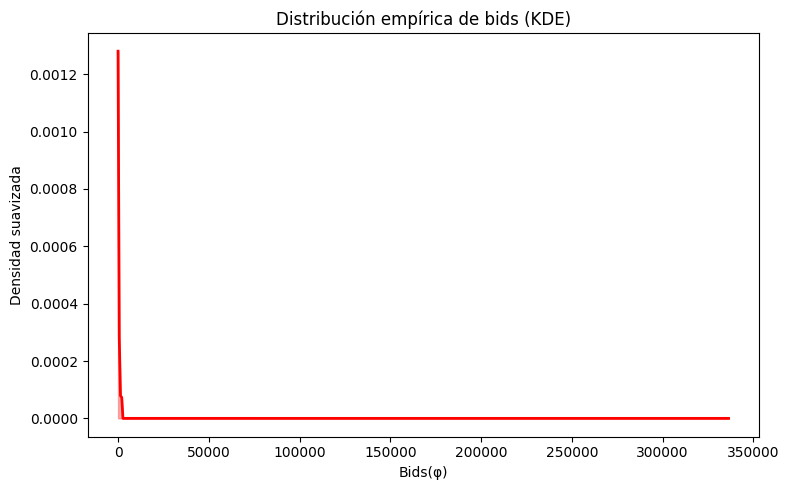

In [22]:
bids = pd.to_numeric(df_grouped['precio_d'], errors='coerce').dropna()

# Calcular densidad KDE
kde = gaussian_kde(bids)
x_vals = np.linspace(phi.min(), phi.max(), 500)
y_vals = kde(x_vals)

plt.figure(figsize=(8,5))
plt.plot(x_vals, y_vals, color="red", linewidth=2)
plt.fill_between(x_vals, y_vals, color="red", alpha=0.3)
plt.xlabel("Bids(φ)")
plt.ylabel("Densidad suavizada")
plt.title("Distribución empírica de bids (KDE)")
plt.tight_layout()
plt.show()


### Más markup - la grandes

In [23]:
df_result[df_result['CodigoPlanta'].isin(['GVIO', 'PES1', 'SNCR'])]
#PES1 es ituango, GVIO es guavio, SNCR es san carlos

,FechaHora,CodigoPlanta,precio,cantidad,cantidad_pos,Fecha,cluster,gamma_thumb,EQpos,EdQb,ratio_prueba,phi_h
5026,2025-05-01 00:00:00,GVIO,102.64,1200000.0,1200000.0,2025-05-01,8,24.946481,1200000.0,-1574.291012,-762.247888,0.000000
5027,2025-05-01 01:00:00,GVIO,102.64,1200000.0,1200000.0,2025-05-01,8,24.946481,1200000.0,-1574.291012,-762.247888,0.000000
5028,2025-05-01 02:00:00,GVIO,102.64,1200000.0,1200000.0,2025-05-01,8,24.946481,1200000.0,-1574.291012,-762.247888,0.000000
5029,2025-05-01 03:00:00,GVIO,102.64,1200000.0,1200000.0,2025-05-01,8,24.946481,1200000.0,-1574.291012,-762.247888,0.000000
5030,2025-05-01 04:00:00,GVIO,102.64,1200000.0,1200000.0,2025-05-01,8,24.946481,1200000.0,-1574.291012,-762.247888,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
10886,2025-05-15 19:00:00,SNCR,117.39,1240000.0,1240000.0,2025-05-15,9,24.943955,1240000.0,2186.805012,567.037296,801.817296
10887,2025-05-15 20:00:00,SNCR,117.39,1240000.0,1240000.0,2025-05-15,9,24.943955,1240000.0,4962.332456,249.882492,484.662492
10888,2025-05-15 21:00:00,SNCR,117.39,1240000.0,1240000.0,2025-05-15,9,24.943955,1240000.0,6151.256281,201.584838,436.364838
10889,2025-05-15 22:00:00,SNCR,117.39,1240000.0,1240000.0,2025-05-15,9,24.943955,1240000.0,-105.470865,-11756.801244,0.000000
